In [ ]:
import sys
!{sys.executable} -m pip install mlxtend 

In [ ]:
# Import Required Libraries
import pandas as pd
import math
import random
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import openpyxl
from openpyxl.styles import PatternFill
import squarify
import stemgraphic
import plotly.graph_objects as go
import plotly.express as px
import scipy.stats as stats
import mlxtend
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.frequent_patterns import fpgrowth

In [ ]:
#loading dataset
data = pd.read_csv(r"drugs_side_effects_drugs_com.csv")
data


drug_name medical_condition  \
0        doxycycline              Acne   
1     spironolactone              Acne   
2        minocycline              Acne   
3           Accutane              Acne   
4        clindamycin              Acne   
...              ...               ...   
2926   benzphetamine       Weight Loss   
2927    fenfluramine       Weight Loss   
2928     Fendique ER       Weight Loss   
2929        Imcivree       Weight Loss   
2930   setmelanotide       Weight Loss   

                                           side_effects  \
0     (hives, difficult breathing, swelling in your ...   
1     hives ; difficulty breathing; swelling of your...   
2     skin rash, fever, swollen glands, flu-like sym...   
3     problems with your vision or hearing; muscle o...   
4     hives ; difficult breathing; swelling of your ...   
...                                                 ...   
2926  hives ; difficulty breathing; swelling of your...   
2927  hives ; difficult breathing; swelling of your ...   
2928                                                NaN   
2929  Imcivree may cause serious side effects, inclu...   
2930  hives ; difficult breathing; swelling of your ...   

                  generic_name  \
0                  doxycycline   
1               spironolactone   
2                  minocycline   
3          isotretinoin (oral)   
4          clindamycin topical   
...                        ...   
2926             benzphetamine   
2927              fenfluramine   
2928  phendimetrazine tartrate   
2929             setmelanotide   
2930             setmelanotide   

                                           drug_classes  \
0            Miscellaneous antimalarials, Tetracyclines   
1     Aldosterone receptor antagonists, Potassium-sp...   
2                                         Tetracyclines   
3     Miscellaneous antineoplastics, Miscellaneous u...   
4          Topical acne agents, Vaginal anti-infectives   
...                                                 ...   
2926                        Anorexiants, CNS stimulants   
2927  Anorexiants, CNS stimulants, Miscellaneous ant...   
2928                        Anorexiants, CNS stimulants   
2929                     Melanocortin receptor agonists   
2930                     Melanocortin receptor agonists   

                                            brand_names activity rx_otc  \
0     Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...      87%     Rx   
1                                   Aldactone, CaroSpir      82%     Rx   
2     Dynacin, Minocin, Minolira, Solodyn, Ximino, V...      48%     Rx   
3                                                   NaN      41%     Rx   
4     Cleocin T, Clindacin ETZ, Clindacin P, Clindag...      39%     Rx   
...                                                 ...      ...    ...   
2926                                    Didrex, Regimex       2%     Rx   
2927                                           Fintepla       1%     Rx   
2928                                                NaN       0%     Rx   
2929                                                NaN       0%     Rx   
2930                                           Imcivree       0%     Rx   

     pregnancy_category csa alcohol  \
0                     D   N       X   
1                     C   N       X   
2                     D   N     NaN   
3                     X   N       X   
4                     B   N     NaN   
...                 ...  ..     ...   
2926                  X   3       X   
2927                  C   4       X   
2928                  C   3       X   
2929                NaN   N     NaN   
2930                NaN   N     NaN   

                                          related_drugs  \
0     amoxicillin: https://www.drugs.com/amoxicillin...   
1     amlodipine: https://www.drugs.com/amlodipine.h...   
2     amoxicillin: https://www.drugs.com/amoxicillin...   
3     doxycycline: https://www.drugs.com/doxycycline...   
4     doxycycl

In [ ]:
print(f"Num of attributes: {data.shape[1]}")
print(f"Num of rows of data: {data.shape[0]}")

Num of attributes: 17
Num of rows of data: 2931


In [ ]:
#data preprocessing
print(data.columns.tolist())
data = data.drop(['csa', 'drug_link', 'medical_condition_url'], axis=1)
data

['drug_name', 'medical_condition', 'side_effects', 'generic_name', 'drug_classes', 'brand_names', 'activity', 'rx_otc', 'pregnancy_category', 'csa', 'alcohol', 'related_drugs', 'medical_condition_description', 'rating', 'no_of_reviews', 'drug_link', 'medical_condition_url']


drug_name medical_condition  \
0        doxycycline              Acne   
1     spironolactone              Acne   
2        minocycline              Acne   
3           Accutane              Acne   
4        clindamycin              Acne   
...              ...               ...   
2926   benzphetamine       Weight Loss   
2927    fenfluramine       Weight Loss   
2928     Fendique ER       Weight Loss   
2929        Imcivree       Weight Loss   
2930   setmelanotide       Weight Loss   

                                           side_effects  \
0     (hives, difficult breathing, swelling in your ...   
1     hives ; difficulty breathing; swelling of your...   
2     skin rash, fever, swollen glands, flu-like sym...   
3     problems with your vision or hearing; muscle o...   
4     hives ; difficult breathing; swelling of your ...   
...                                                 ...   
2926  hives ; difficulty breathing; swelling of your...   
2927  hives ; difficult breathing; swelling of your ...   
2928                                                NaN   
2929  Imcivree may cause serious side effects, inclu...   
2930  hives ; difficult breathing; swelling of your ...   

                  generic_name  \
0                  doxycycline   
1               spironolactone   
2                  minocycline   
3          isotretinoin (oral)   
4          clindamycin topical   
...                        ...   
2926             benzphetamine   
2927              fenfluramine   
2928  phendimetrazine tartrate   
2929             setmelanotide   
2930             setmelanotide   

                                           drug_classes  \
0            Miscellaneous antimalarials, Tetracyclines   
1     Aldosterone receptor antagonists, Potassium-sp...   
2                                         Tetracyclines   
3     Miscellaneous antineoplastics, Miscellaneous u...   
4          Topical acne agents, Vaginal anti-infectives   
...                                                 ...   
2926                        Anorexiants, CNS stimulants   
2927  Anorexiants, CNS stimulants, Miscellaneous ant...   
2928                        Anorexiants, CNS stimulants   
2929                     Melanocortin receptor agonists   
2930                     Melanocortin receptor agonists   

                                            brand_names activity rx_otc  \
0     Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...      87%     Rx   
1                                   Aldactone, CaroSpir      82%     Rx   
2     Dynacin, Minocin, Minolira, Solodyn, Ximino, V...      48%     Rx   
3                                                   NaN      41%     Rx   
4     Cleocin T, Clindacin ETZ, Clindacin P, Clindag...      39%     Rx   
...                                                 ...      ...    ...   
2926                                    Didrex, Regimex       2%     Rx   
2927                                           Fintepla       1%     Rx   
2928                                                NaN       0%     Rx   
2929                                                NaN       0%     Rx   
2930                                           Imcivree       0%     Rx   

     pregnancy_category alcohol  \
0                     D       X   
1                     C       X   
2                     D     NaN   
3                     X       X   
4                     B     NaN   
...                 ...     ...   
2926                  X       X   
2927                  C       X   
2928                  C       X   
2929                NaN     NaN   
2930                NaN     NaN   

                                          related_drugs  \
0     amoxicillin: https://www.drugs.com/amoxicillin...   
1     amlodipine: https://www.drugs.com/amlodipine.h...   
2     amoxicillin: https://www.drugs.com/amoxicillin...   
3     doxycycline: https://www.drugs.com/doxycycline...   
4     doxycycline: https://www.drugs.com/doxycycline...   
...

In [ ]:
columns_to_be_modified = ['pregnancy_category', 'alcohol']

# Every other attributes with null values is indication that the data is not available

for i in data.index:
    for j in columns_to_be_modified:
        check_ = data[j].isnull()
        if check_[i] == True:
            data.loc[i, j] = 0
            
data

drug_name medical_condition  \
0        doxycycline              Acne   
1     spironolactone              Acne   
2        minocycline              Acne   
3           Accutane              Acne   
4        clindamycin              Acne   
...              ...               ...   
2926   benzphetamine       Weight Loss   
2927    fenfluramine       Weight Loss   
2928     Fendique ER       Weight Loss   
2929        Imcivree       Weight Loss   
2930   setmelanotide       Weight Loss   

                                           side_effects  \
0     (hives, difficult breathing, swelling in your ...   
1     hives ; difficulty breathing; swelling of your...   
2     skin rash, fever, swollen glands, flu-like sym...   
3     problems with your vision or hearing; muscle o...   
4     hives ; difficult breathing; swelling of your ...   
...                                                 ...   
2926  hives ; difficulty breathing; swelling of your...   
2927  hives ; difficult breathing; swelling of your ...   
2928                                                NaN   
2929  Imcivree may cause serious side effects, inclu...   
2930  hives ; difficult breathing; swelling of your ...   

                  generic_name  \
0                  doxycycline   
1               spironolactone   
2                  minocycline   
3          isotretinoin (oral)   
4          clindamycin topical   
...                        ...   
2926             benzphetamine   
2927              fenfluramine   
2928  phendimetrazine tartrate   
2929             setmelanotide   
2930             setmelanotide   

                                           drug_classes  \
0            Miscellaneous antimalarials, Tetracyclines   
1     Aldosterone receptor antagonists, Potassium-sp...   
2                                         Tetracyclines   
3     Miscellaneous antineoplastics, Miscellaneous u...   
4          Topical acne agents, Vaginal anti-infectives   
...                                                 ...   
2926                        Anorexiants, CNS stimulants   
2927  Anorexiants, CNS stimulants, Miscellaneous ant...   
2928                        Anorexiants, CNS stimulants   
2929                     Melanocortin receptor agonists   
2930                     Melanocortin receptor agonists   

                                            brand_names activity rx_otc  \
0     Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...      87%     Rx   
1                                   Aldactone, CaroSpir      82%     Rx   
2     Dynacin, Minocin, Minolira, Solodyn, Ximino, V...      48%     Rx   
3                                                   NaN      41%     Rx   
4     Cleocin T, Clindacin ETZ, Clindacin P, Clindag...      39%     Rx   
...                                                 ...      ...    ...   
2926                                    Didrex, Regimex       2%     Rx   
2927                                           Fintepla       1%     Rx   
2928                                                NaN       0%     Rx   
2929                                                NaN       0%     Rx   
2930                                           Imcivree       0%     Rx   

     pregnancy_category alcohol  \
0                     D       X   
1                     C       X   
2                     D       0   
3                     X       X   
4                     B       0   
...                 ...     ...   
2926                  X       X   
2927                  C       X   
2928                  C       X   
2929                  0       0   
2930                  0       0   

                                          related_drugs  \
0     amoxicillin: https://www.drugs.com/amoxicillin...   
1     amlodipine: https://www.drugs.com/amlodipine.h...   
2     amoxicillin: https://www.drugs.com/amoxicillin...   
3     doxycycline: https://www.drugs.com/doxycycline...   
4     doxycycline: https://www.drugs.com/doxycycline...   
...

In [ ]:
# Remove any empty values
data1 = data
data_1 = data1.dropna(axis=0)
data_1

drug_name medical_condition  \
0                      doxycycline              Acne   
1                   spironolactone              Acne   
2                      minocycline              Acne   
4                      clindamycin              Acne   
5                        Aldactone              Acne   
...                            ...               ...   
2914               phendimetrazine       Weight Loss   
2918                       Pregnyl       Weight Loss   
2923  chorionic gonadotropin (hcg)       Weight Loss   
2924                       Lomaira       Weight Loss   
2926                 benzphetamine       Weight Loss   

                                           side_effects  \
0     (hives, difficult breathing, swelling in your ...   
1     hives ; difficulty breathing; swelling of your...   
2     skin rash, fever, swollen glands, flu-like sym...   
4     hives ; difficult breathing; swelling of your ...   
5     hives ; difficulty breathing; swelling of your...   
...                                                 ...   
2914  hives ; difficult breathing; swelling of your ...   
2918  hives ; difficult breathing; swelling of your ...   
2923  hives ; difficult breathing; swelling of your ...   
2924  hives ; difficult breathing; swelling of your ...   
2926  hives ; difficulty breathing; swelling of your...   

                                         generic_name  \
0                                         doxycycline   
1                                      spironolactone   
2                                         minocycline   
4                                 clindamycin topical   
5                                      spironolactone   
...                                               ...   
2914                                  phendimetrazine   
2918  human chorionic gonadotropin (HCG) (injectable)   
2923  human chorionic gonadotropin (HCG) (injectable)   
2924                                      phentermine   
2926                                    benzphetamine   

                                           drug_classes  \
0            Miscellaneous antimalarials, Tetracyclines   
1     Aldosterone receptor antagonists, Potassium-sp...   
2                                         Tetracyclines   
4          Topical acne agents, Vaginal anti-infectives   
5     Aldosterone receptor antagonists, Potassium-sp...   
...                                                 ...   
2914                        Anorexiants, CNS stimulants   
2918                                      Gonadotropins   
2923                                      Gonadotropins   
2924                                        Anorexiants   
2926                        Anorexiants, CNS stimulants   

                                            brand_names activity rx_otc  \
0     Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...      87%     Rx   
1                                   Aldactone, CaroSpir      82%     Rx   
2     Dynacin, Minocin, Minolira, Solodyn, Ximino, V...      48%     Rx   
4     Cleocin T, Clindacin ETZ, Clindacin P, Clindag...      39%     Rx   
5                                              CaroSpir      35%     Rx   
...                                                 ...      ...    ...   
2914                                            Melfiat      14%     Rx   
2918                                   Novarel, Ovidrel       6%     Rx   
2923  Novarel, Ovidrel, Pregnyl, Profasi, Chorex, Go...       3%     Rx   
2924                                 Adipex-P, Suprenza       3%     Rx   
2926                                    Didrex, Regimex       2%     Rx   

     pregnancy_category alcohol  \
0                     D       X   
1                     C       X   
2                     D       0   
4                     B       0   
5                     C       X   
...                 ...     ...   
2914                  C       X   
2918                  X       0   
2923                  X       0  

In [ ]:
#data transformation
unique_medical_conditions = list(data.medical_condition.unique())
unique_drugs = list(data.drug_name.unique())

In [ ]:
# Tokenization
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import sent_tokenize
nltk.download('stopwords')
import string

def tokenize(document):
    words = []
    document = str(document)
    lower_case = document.lower()
    tokenized = nltk.tokenize.word_tokenize(document)

    # Remove punctuations and english stopwords
    for word in tokenized:
        if(word not in string.punctuation and word not in nltk.corpus.stopwords.words("english")):
            words.append(word)
    return words

side_effects = []
for i in data.index:
    words = tokenize(data['side_effects'][i])
    words = list(set(words))
    side_effects.append(words)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\geeta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\geeta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\geeta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Related Drugs
related_drugs = []
for i in data.index:
    strings = []
    string = ""
    for aa in range(len(str(data["related_drugs"][i]))):
        if str(data["related_drugs"][i])[aa] == ":":
            strings.append(string)
            string = ""
            break
        else:
            string += str(data["related_drugs"][i])[aa]
    string = ""
    for j in range(len(str(data["related_drugs"][i]))):
        if str(data["related_drugs"][i])[j] == "|":
            for k in range(j+2, len(str(data["related_drugs"][i]))):
                if str(data["related_drugs"][i][k]) == ":":
                    strings.append(string)
                    string = ""
                    break
                else:
                    string += str(data["related_drugs"][i][k])
            j = k
    related_drugs.append(strings)   

In [ ]:
# Tokenization
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('stopwords')
import string

def tokenize(document):
    words = []
    document = str(document)
    lower_case = document.lower()
    tokenized = nltk.tokenize.word_tokenize(document)

    # Remove punctuations and english stopwords
    for word in tokenized:
        if(word not in string.punctuation and word not in nltk.corpus.stopwords.words("english")):
            words.append(word)
    return words

# Medical Condition Description
medical_condition_descriptions = []
for i in range(len(unique_medical_conditions)):
    for j in data.index:
        if str(data["medical_condition"][j]) == unique_medical_conditions[i]:
            medical_condition_descriptions.append(data["medical_condition_description"][j])
            break
            
tokenized_medical_condition_descriptions = []

for i in medical_condition_descriptions:
    words = tokenize(i)
    words = list(set(words))
    tokenized_medical_condition_descriptions.append(words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\geeta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def load_data():
    data = pd.read_csv(r"drugs_side_effects_drugs_com.csv")
    data = data.drop(['csa', 'drug_link', 'medical_condition_url'], axis=1)
    columns_to_be_modified = ['pregnancy_category', 'alcohol']
    # Every other attributes with null values is indication that the data is not available
    for i in data.index:
        for j in columns_to_be_modified:
            check_ = data[j].isnull()
            if check_[i] == True:
                data.loc[i, j] = 0
    return data

data = load_data()
for i in side_effects:
    i = set(i)
    i = list(i)

sample = 0
print("SAMPLE TOKENIZED DATA\n")
print(f"Drug_name: {data['drug_name'][sample]}\n\nMedical Condition: {data['medical_condition'][sample]}\n\nSide Effects: {side_effects[sample]}\n\nRelated Drugs: {related_drugs[sample]}\n\n Medical Condition Descriptions: {tokenized_medical_condition_descriptions[sample]}")

SAMPLE TOKENIZED DATA

Drug_name: doxycycline

Medical Condition: Acne

Side Effects: ['bleeding', 'little', 'cause', 'rash', 'causes', 'urine', 'vaginal', 'burning', 'dizziness', 'may', 'easy', 'low', 'serious', 'loss', 'darkened', 'weakness', 'counts', 'chest', 'side', 'tiredness', 'blood', 'upper', 'nausea', 'problems', 'fast', 'appetite', 'breath', 'Doxycycline', 'include', 'sore', 'spreads', 'glands', 'bruising', 'breathing', 'body', 'fever', 'urination', 'swallowing', 'swelling', 'bloody', 'feeling', 'reaction', 'drug', 'upset', 'white', 'chills', 'irritation', 'cell', 'heart', 'using', 'discharge', 'Symptoms', 'swollen', 'aches', 'weeks', 'behind', 'unusual', 'red', 'flu-like', 'pale', 'back', 'purple', 'face', 'difficult', 'Common', 'effects', 'blistering', 'vision', 'many', 'rhythm', 'jaundice', 'several', 'medical', 'skin', 'Call', 'irregular', 'throat', 'severe', 'eyes', 'short', 'trouble', 'hives', 'ears', 'itching', 'parts', 'dark', 'muscle', 'This', 'ringing', 'doctor', '

In [ ]:
print("After data preprocessing, data is as follows:")
data

After data preprocessing, data is as follows:


drug_name medical_condition  \
0        doxycycline              Acne   
1     spironolactone              Acne   
2        minocycline              Acne   
3           Accutane              Acne   
4        clindamycin              Acne   
...              ...               ...   
2926   benzphetamine       Weight Loss   
2927    fenfluramine       Weight Loss   
2928     Fendique ER       Weight Loss   
2929        Imcivree       Weight Loss   
2930   setmelanotide       Weight Loss   

                                           side_effects  \
0     (hives, difficult breathing, swelling in your ...   
1     hives ; difficulty breathing; swelling of your...   
2     skin rash, fever, swollen glands, flu-like sym...   
3     problems with your vision or hearing; muscle o...   
4     hives ; difficult breathing; swelling of your ...   
...                                                 ...   
2926  hives ; difficulty breathing; swelling of your...   
2927  hives ; difficult breathing; swelling of your ...   
2928                                                NaN   
2929  Imcivree may cause serious side effects, inclu...   
2930  hives ; difficult breathing; swelling of your ...   

                  generic_name  \
0                  doxycycline   
1               spironolactone   
2                  minocycline   
3          isotretinoin (oral)   
4          clindamycin topical   
...                        ...   
2926             benzphetamine   
2927              fenfluramine   
2928  phendimetrazine tartrate   
2929             setmelanotide   
2930             setmelanotide   

                                           drug_classes  \
0            Miscellaneous antimalarials, Tetracyclines   
1     Aldosterone receptor antagonists, Potassium-sp...   
2                                         Tetracyclines   
3     Miscellaneous antineoplastics, Miscellaneous u...   
4          Topical acne agents, Vaginal anti-infectives   
...                                                 ...   
2926                        Anorexiants, CNS stimulants   
2927  Anorexiants, CNS stimulants, Miscellaneous ant...   
2928                        Anorexiants, CNS stimulants   
2929                     Melanocortin receptor agonists   
2930                     Melanocortin receptor agonists   

                                            brand_names activity rx_otc  \
0     Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...      87%     Rx   
1                                   Aldactone, CaroSpir      82%     Rx   
2     Dynacin, Minocin, Minolira, Solodyn, Ximino, V...      48%     Rx   
3                                                   NaN      41%     Rx   
4     Cleocin T, Clindacin ETZ, Clindacin P, Clindag...      39%     Rx   
...                                                 ...      ...    ...   
2926                                    Didrex, Regimex       2%     Rx   
2927                                           Fintepla       1%     Rx   
2928                                                NaN       0%     Rx   
2929                                                NaN       0%     Rx   
2930                                           Imcivree       0%     Rx   

     pregnancy_category alcohol  \
0                     D       X   
1                     C       X   
2                     D       0   
3                     X       X   
4                     B       0   
...                 ...     ...   
2926                  X       X   
2927                  C       X   
2928                  C       X   
2929                  0       0   
2930                  0       0   

                                          related_drugs  \
0     amoxicillin: https://www.drugs.com/amoxicillin...   
1     amlodipine: https://www.drugs.com/amlodipine.h...   
2     amoxicillin: https://www.drugs.com/amoxicillin...   
3     doxycycline: https://www.drugs.com/doxycycline...   
4     doxycycline: https://www.drugs.com/doxycycline...   
...

In [ ]:
#statistical summary of the data
print(f"Dimension of the dataset: {data.shape}\n")
cnt = 0
for i in data.columns:
    print(f"Mode in column {data.columns[cnt]}: {statistics.mode(data[data.columns[cnt]])}")
    cnt += 1
print("\n")

print(f"Data types of each column:\n{data.dtypes}\n")

Dimension of the dataset: (2931, 14)

Mode in column drug_name: triamcinolone
Mode in column medical_condition: Pain
Mode in column side_effects: nan
Mode in column generic_name: nan
Mode in column drug_classes: Upper respiratory combinations
Mode in column brand_names: nan
Mode in column activity: 0%
Mode in column rx_otc: Rx
Mode in column pregnancy_category: C
Mode in column alcohol: 0
Mode in column related_drugs: nan
Mode in column medical_condition_description: Pain An unpleasant sensory and emotional experience associated with actual or potential tissue damage or described in terms of such damage.
Mode in column rating: 10.0
Mode in column no_of_reviews: 1.0


Data types of each column:
drug_name                         object
medical_condition                 object
side_effects                      object
generic_name                      object
drug_classes                      object
brand_names                       object
activity                          object
rx_otc    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   drug_name                      2931 non-null   object 
 1   medical_condition              2931 non-null   object 
 2   side_effects                   2807 non-null   object 
 3   generic_name                   2888 non-null   object 
 4   drug_classes                   2849 non-null   object 
 5   brand_names                    1718 non-null   object 
 6   activity                       2931 non-null   object 
 7   rx_otc                         2930 non-null   object 
 8   pregnancy_category             2931 non-null   object 
 9   alcohol                        2931 non-null   object 
 10  related_drugs                  1462 non-null   object 
 11  medical_condition_description  2931 non-null   object 
 12  rating                         1586 non-null   f

drug_name                           0
medical_condition                   0
side_effects                      124
generic_name                       43
drug_classes                       82
brand_names                      1213
activity                            0
rx_otc                              1
pregnancy_category                  0
alcohol                             0
related_drugs                    1469
medical_condition_description       0
rating                           1345
no_of_reviews                    1345
dtype: int64

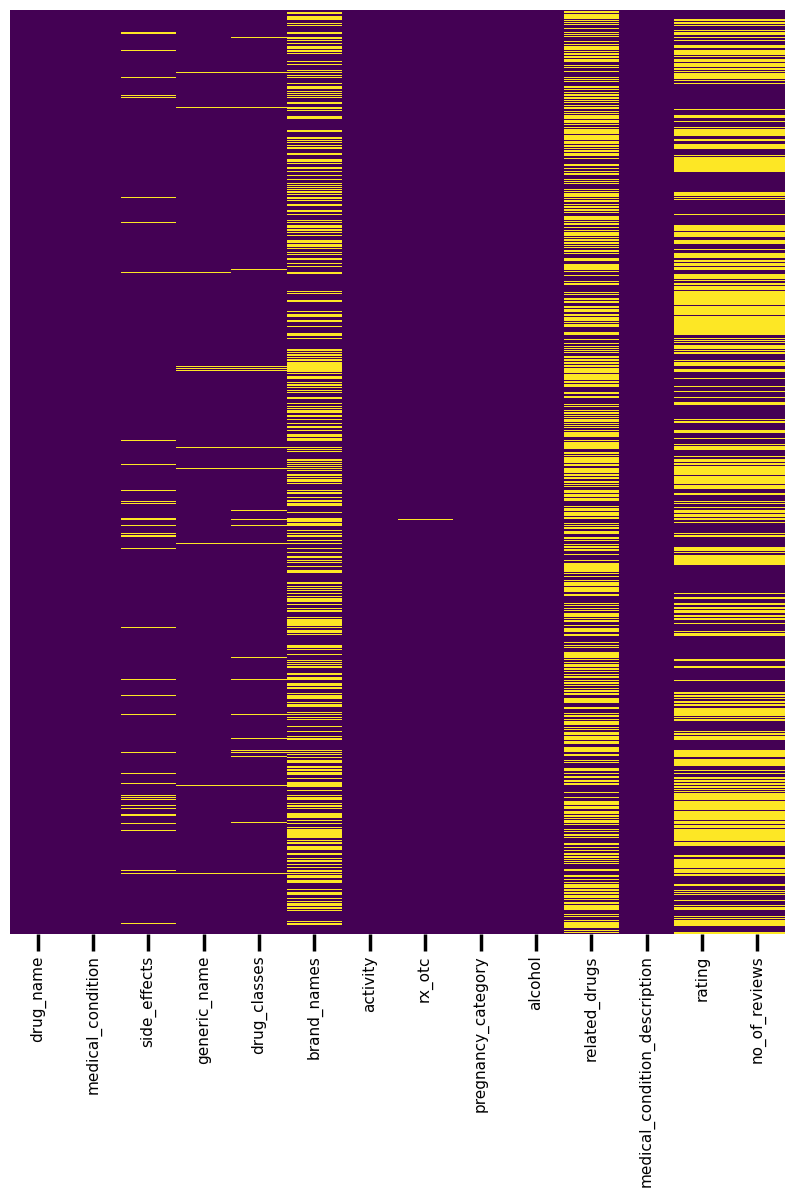

In [ ]:
df =data
df.info()
# calculate duplicates
dups = df.duplicated()
# report if there are any duplicates
print(df.any())
# list all duplicate rows

print("Duplicate Rows",df[dups])
#Cardinality 
df.nunique() # To determine the maximum and minimum number of variations in each column of the dataset
#Lets now check for null fields
import seaborn as sns
plt.figure(figsize=(10,12))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
df.isnull().sum()

In [ ]:
#descriptive analytics
# Group data accordingly
unique_medical_conditions = list(data.medical_condition.unique())
unique_drugs = list(data.drug_name.unique())

print(f"List of unique Medical Conditions being discussed are:\n{unique_medical_conditions}\n\n")
print(f"List of unique drugs being discussed are:\n{unique_drugs}\n\n")

print(f"Number of unique drugs: {len(unique_drugs)}")
print(f"Total data rows: {data.shape[0]}")

List of unique Medical Conditions being discussed are:
['Acne', 'ADHD', 'AIDS/HIV', 'Allergies', "Alzheimer's", 'Angina', 'Anxiety', 'Asthma', 'Bipolar Disorder', 'Bronchitis', 'Cancer', 'Cholesterol', 'Colds & Flu', 'Constipation', 'COPD', 'Covid 19', 'Depression', 'Diabetes (Type 1)', 'Diabetes (Type 2)', 'Diarrhea', 'Eczema', 'Erectile Dysfunction', 'Gastrointestinal', 'GERD (Heartburn)', 'Gout', 'Hair Loss', 'Hayfever', 'Herpes', 'Hypertension', 'Hypothyroidism', 'IBD (Bowel)', 'Incontinence', 'Insomnia', 'Menopause', 'Migraine', 'Osteoarthritis', 'Osteoporosis', 'Pain', 'Pneumonia', 'Psoriasis', 'Rheumatoid Arthritis', 'Schizophrenia', 'Seizures', 'Stroke', 'Swine Flu', 'UTI', 'Weight Loss']


List of unique drugs being discussed are:
['doxycycline', 'spironolactone', 'minocycline', 'Accutane', 'clindamycin', 'Aldactone', 'tretinoin', 'isotretinoin', 'Bactrim', 'Retin-A', 'Aczone', 'benzoyl peroxide', 'Differin', 'Epiduo', 'adapalene', 'cephalexin', 'Doryx', 'tetracycline', 'Septr

In [ ]:
# Drugs being used for multiple medical conditions
drugs_multiple_condns = []
drugs_so_far = []

for i in data.index:
    if data["drug_name"][i] in drugs_so_far and data["drug_name"][i] not in drugs_multiple_condns:
        drugs_multiple_condns.append(data["drug_name"][i])
    if data["drug_name"][i] not in drugs_so_far:
        drugs_so_far.append(data["drug_name"][i])

print("The below is the list of only drugs that have multi-purpose:")
for i in drugs_multiple_condns:
    print(i)

The below is the list of only drugs that have multi-purpose:
minocycline
erythromycin
triamcinolone
fluocinolone
doxepin
fluticasone
mometasone
beclomethasone
ciclesonide
acyclovir
minoxidil
budesonide
hydrocortisone
cromolyn
diclofenac
diphenhydramine
clindamycin
betamethasone


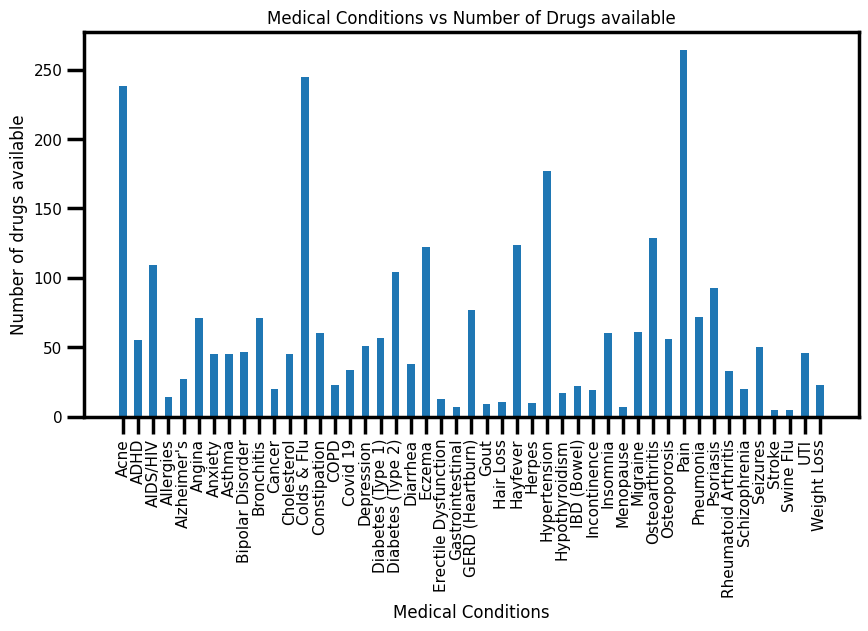

In [ ]:
#Bar graphs
available_drugs_for_condns = [0]*len(unique_medical_conditions)

for i in data.index:
    medical_condition = str(data['medical_condition'][i])
    indexx = unique_medical_conditions.index(medical_condition)
    available_drugs_for_condns[indexx] += 1

#Bar Graph
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(unique_medical_conditions, available_drugs_for_condns, width = 0.5)
plt.xlabel("Medical Conditions")
plt.ylabel(f"Number of drugs available")
plt.title(f"Medical Conditions vs Number of Drugs available")
plt.xticks(rotation=90)
plt.show()

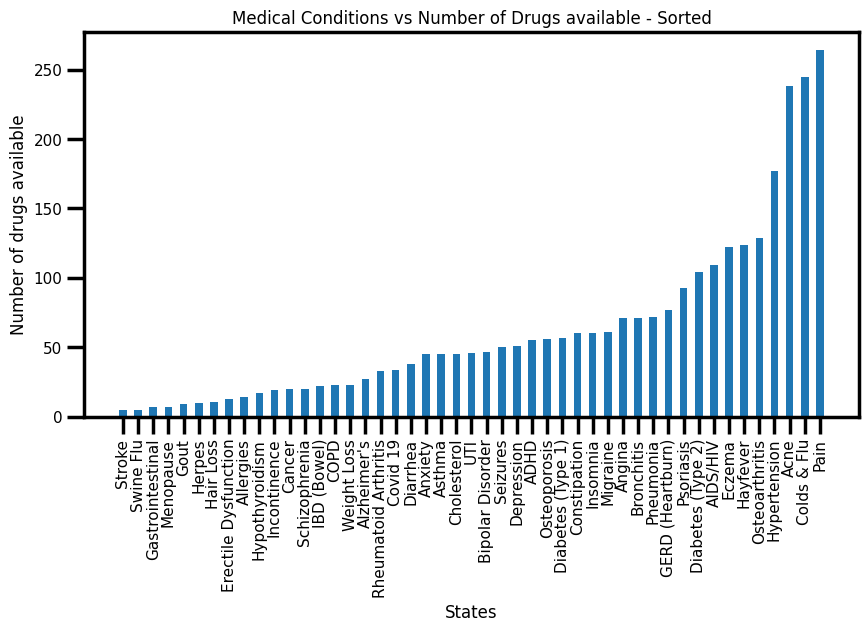

In [ ]:
# Pareto Chart
available_drugs_for_condns, unique_medical_conditions = zip(*sorted(zip(available_drugs_for_condns, unique_medical_conditions)))

#Bar Graph
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(unique_medical_conditions, available_drugs_for_condns, width = 0.5)
plt.xlabel("States")
plt.ylabel(f"Number of drugs available")
plt.title(f"Medical Conditions vs Number of Drugs available - Sorted")
plt.xticks(rotation=90)
plt.show()

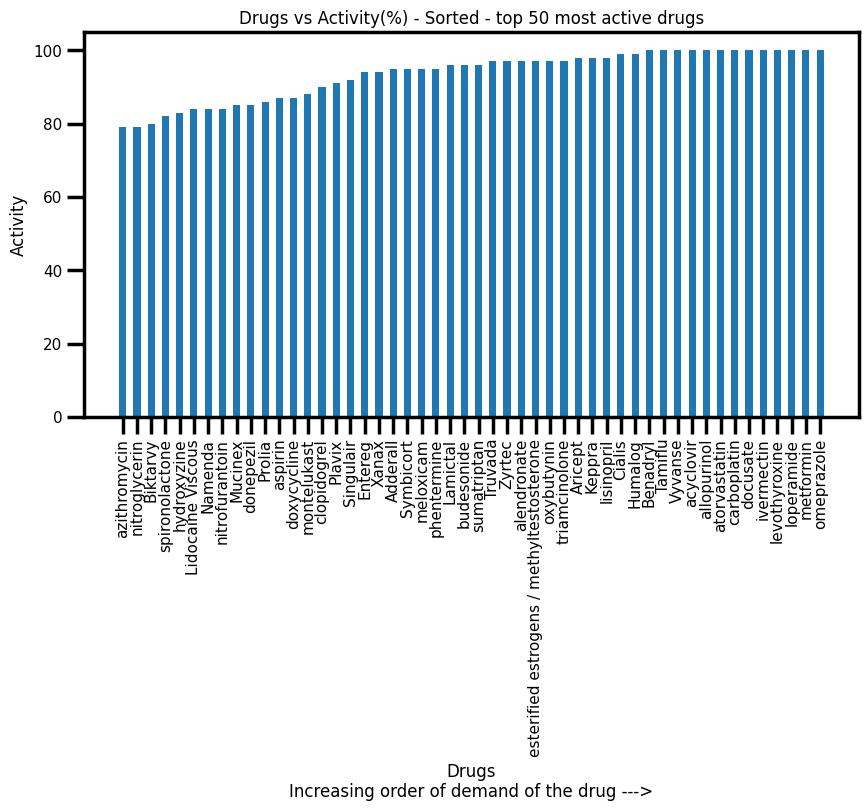

In [ ]:

# Drugs vs Activity
activities = []
drugs = []
for i in data.index:
    activities.append(int(data["activity"][i][:-1]))
    drugs.append(str(data["drug_name"][i]))


# Pareto Chart
activities, drugs = zip(*sorted(zip(activities, drugs)))

#Bar Graph
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(drugs[-50:], activities[-50:], width = 0.5)
plt.xlabel("Drugs\nIncreasing order of demand of the drug --->")
plt.ylabel(f"Activity")
plt.title(f"Drugs vs Activity(%) - Sorted - top 50 most active drugs")
plt.xticks(rotation=90)
plt.show()

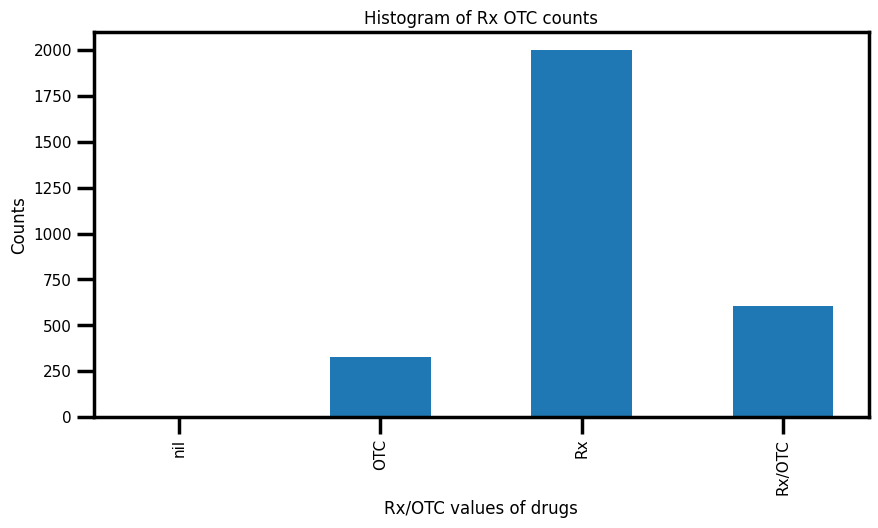

In [ ]:
unique_rx_otc = ['nil', 'OTC', 'Rx', 'Rx/OTC']

cnts_rtx_otc = [0]*len(unique_rx_otc)
for i in data.index:
    if data["rx_otc"][i] == None:
        cnts_rtx_otc[0] += 1
    elif data["rx_otc"][i] == 'OTC':
        cnts_rtx_otc[1] += 1
    elif data["rx_otc"][i] == 'Rx':
        cnts_rtx_otc[2] += 1
    elif data["rx_otc"][i] == 'Rx/OTC':
        cnts_rtx_otc[3] += 1
        
# Pareto Chart

#Bar Graph
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(unique_rx_otc, cnts_rtx_otc, width = 0.5)
plt.xlabel("Rx/OTC values of drugs")
plt.ylabel(f"Counts")
plt.title(f"Histogram of Rx OTC counts")
plt.xticks(rotation=90)
plt.show()

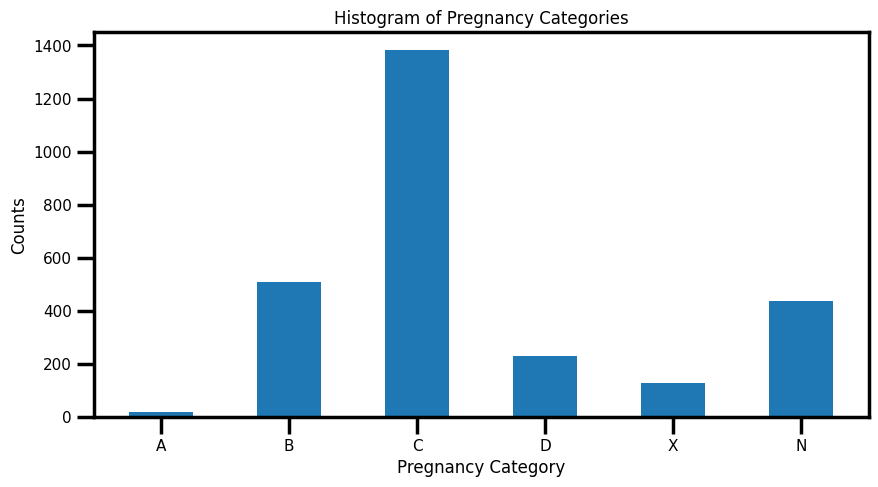

In [ ]:
#pregnancy categories
pregnancy_categories = ['A', 'B', 'C', 'D', 'X', 'N']

cnts_preg_cat = [0]*len(pregnancy_categories)
for i in data.index:
    if data["pregnancy_category"][i] == 'A':
        cnts_preg_cat[0] += 1
    elif data["pregnancy_category"][i] == 'B':
        cnts_preg_cat[1] += 1
    elif data["pregnancy_category"][i] == 'C':
        cnts_preg_cat[2] += 1
    elif data["pregnancy_category"][i] == 'D':
        cnts_preg_cat[3] += 1
    elif data["pregnancy_category"][i] == 'X':
        cnts_preg_cat[4] += 1
    elif data["pregnancy_category"][i] == 'N':
        cnts_preg_cat[5] += 1
    
        
# Pareto Chart
#Bar Graph
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(pregnancy_categories, cnts_preg_cat, width = 0.5)
plt.xlabel("Pregnancy Category")
plt.ylabel(f"Counts")
plt.title(f"Histogram of Pregnancy Categories")
plt.xticks(rotation=0)
plt.show()

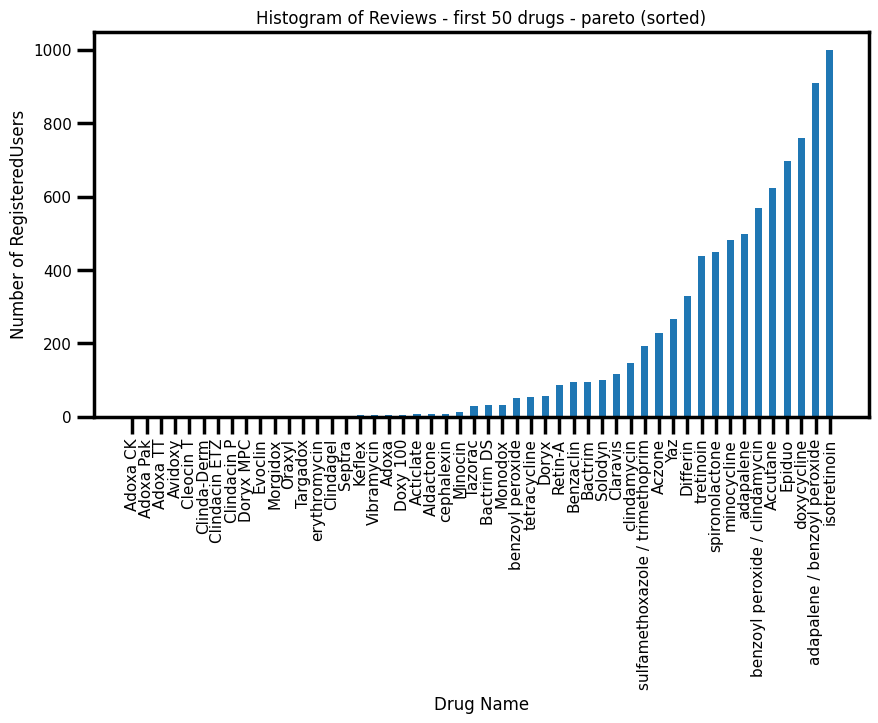

In [ ]:
drug_names = []
no_of_ratings = []

num = 50

cnt = 0
for i in data.index:
    if cnt != num:
        drug_names.append(data["drug_name"][i])
        if not np.isnan(data["no_of_reviews"][i]):
            no_of_ratings.append(int(data["no_of_reviews"][i]))
        else:
            no_of_ratings.append(0)
    else:
        break
    cnt += 1

#Bar Graph
fig = plt.figure(figsize = (10, 5))
no_of_ratings, drug_names = zip(*sorted(zip(no_of_ratings, drug_names)))
# creating the bar plot
plt.bar(drug_names, no_of_ratings, width = 0.5)
plt.xlabel("Drug Name")
plt.ylabel(f"Number of RegisteredUsers")
plt.title(f"Histogram of Reviews - first {num} drugs - pareto (sorted)")
plt.xticks(rotation=90)
plt.show()

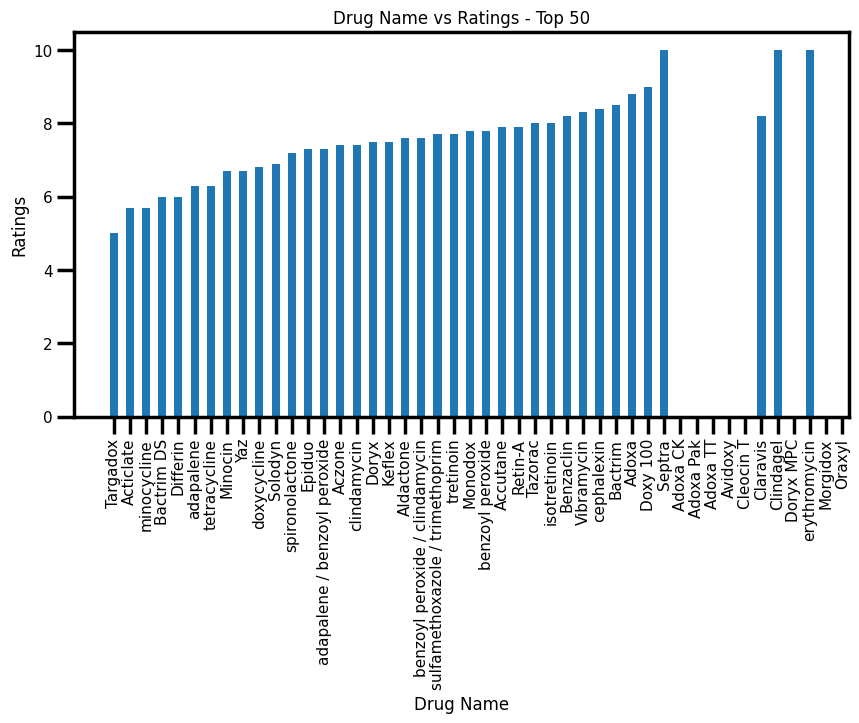

In [ ]:
# Ratings
num = 50
drug_names = data["drug_name"][:num]
ratings = data["rating"][:num]
ratings, drug_names = zip(*sorted(zip(ratings, drug_names)))        
# Pareto Chart
#Bar Graph
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(drug_names, ratings, width = 0.5)
plt.xlabel("Drug Name")
plt.ylabel(f"Ratings")
plt.title(f"Drug Name vs Ratings - Top {num}")
plt.xticks(rotation=90)
plt.show()

C:\Users\geeta\AppData\Local\Temp\ipykernel_11700\3686979007.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='rating', ylabel='count'>

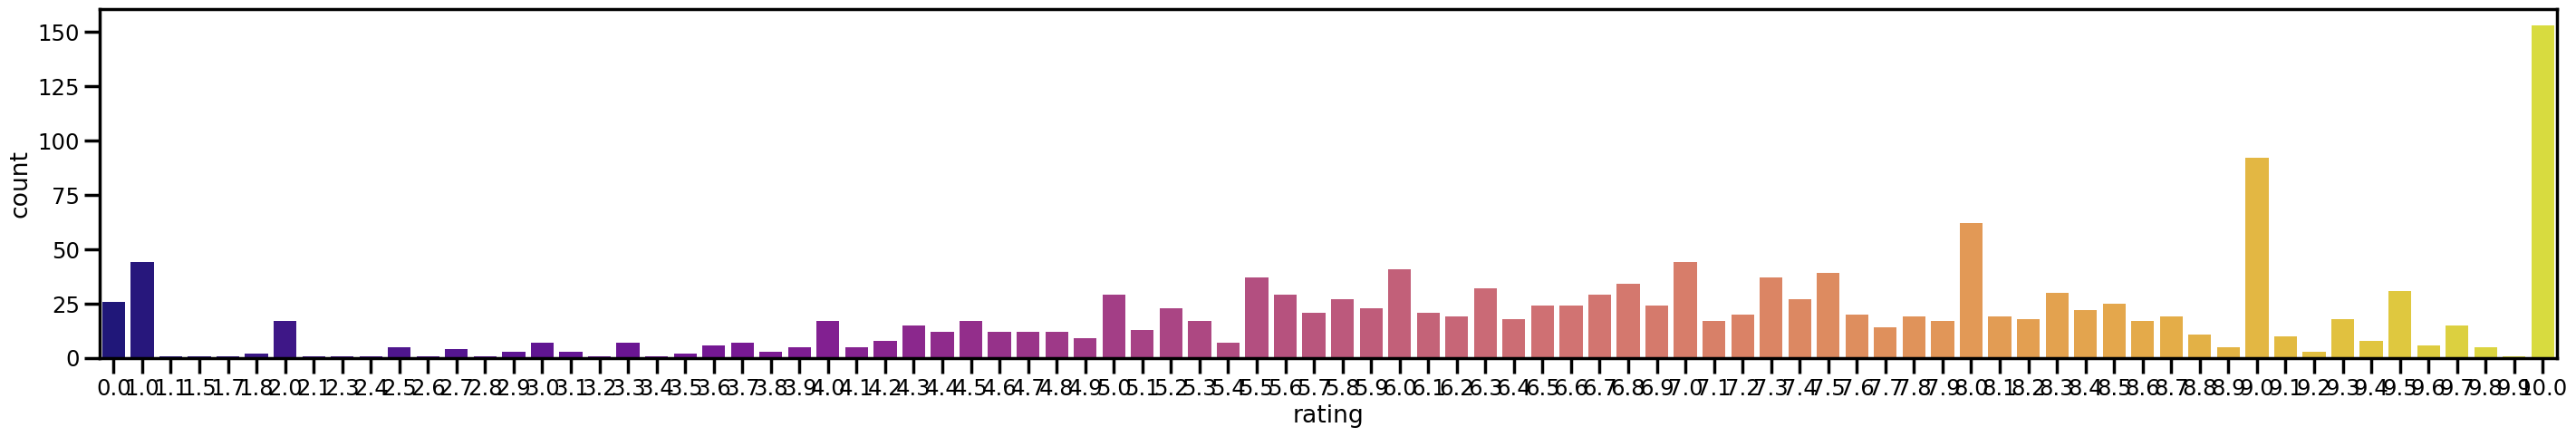

In [ ]:
# Examining the variable's goal rating
sns.set_context('poster', font_scale=0.8)
plt.figure(figsize=(35,5))
sns.countplot(data=data,x = 'rating',palette='plasma')

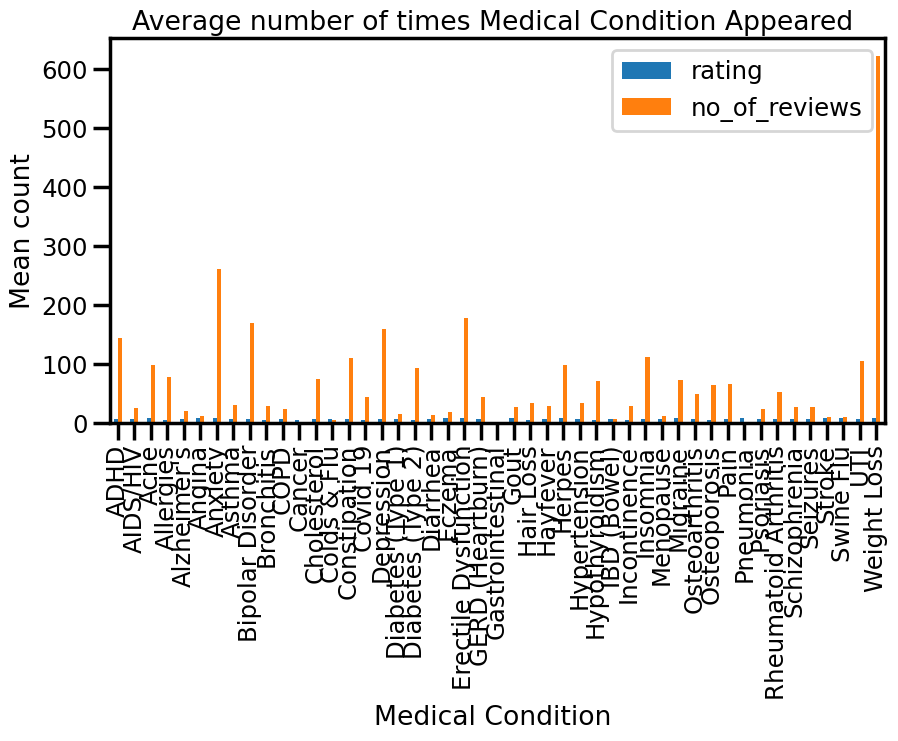

In [ ]:
# data visualisation on medical_condition apears
sns.set_context('poster', font_scale=0.8)
data.groupby('medical_condition').mean(numeric_only=True).plot(kind='bar', figsize=(10,5)) 
plt.xlabel('Medical Condition ')
plt.ylabel('Mean count')
plt.title('Average number of times Medical Condition Appeared ')
plt.show()

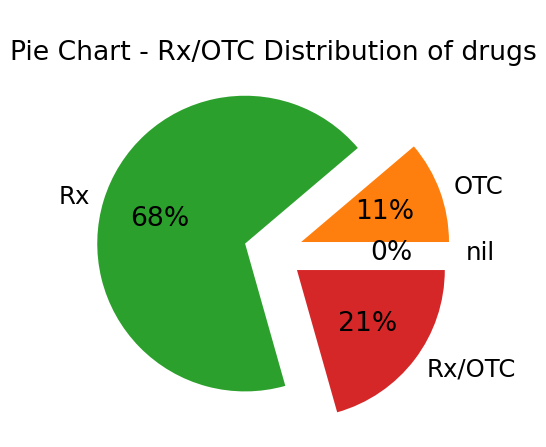

In [ ]:
#pie chart
#Rx/OTC distributions
y = np.array(cnts_rtx_otc)
mylabels = unique_rx_otc
myexplode = [0.2]*len(unique_rx_otc)
plt.title("\nPie Chart - Rx/OTC Distribution of drugs")
plt.pie(y, labels = mylabels, explode = myexplode, autopct='%.0f%%')
plt.show() 

pregnancy_category
C    1382
B     509
N     436
0     229
D     228
X     129
A      18
Name: count, dtype: int64

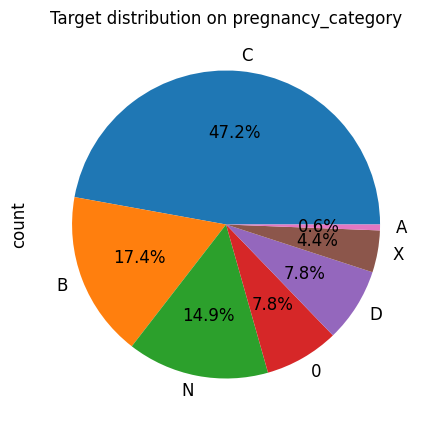

In [ ]:
# Figure size 
sns.set_context('poster', font_scale=0.5)
plt.figure(figsize=(5,5))
# Pie plot
data['pregnancy_category'].value_counts().plot.pie(autopct='%1.1f%%', textprops={'fontsize':12}).set_title("Target distribution on pregnancy_category")
data['pregnancy_category'].value_counts()

medical_condition
Pain                    264
Colds & Flu             245
Acne                    238
Hypertension            177
Osteoarthritis          129
Hayfever                124
Eczema                  122
AIDS/HIV                109
Diabetes (Type 2)       104
Psoriasis                93
GERD (Heartburn)         77
Pneumonia                72
Bronchitis               71
Angina                   71
Migraine                 61
Insomnia                 60
Constipation             60
Diabetes (Type 1)        57
Osteoporosis             56
ADHD                     55
Depression               51
Seizures                 50
Bipolar Disorder         47
UTI                      46
Asthma                   45
Cholesterol              45
Anxiety                  45
Diarrhea                 38
Covid 19                 34
Rheumatoid Arthritis     33
Alzheimer's              27
COPD                     23
Weight Loss              23
IBD (Bowel)              22
Cancer                   20
Sc

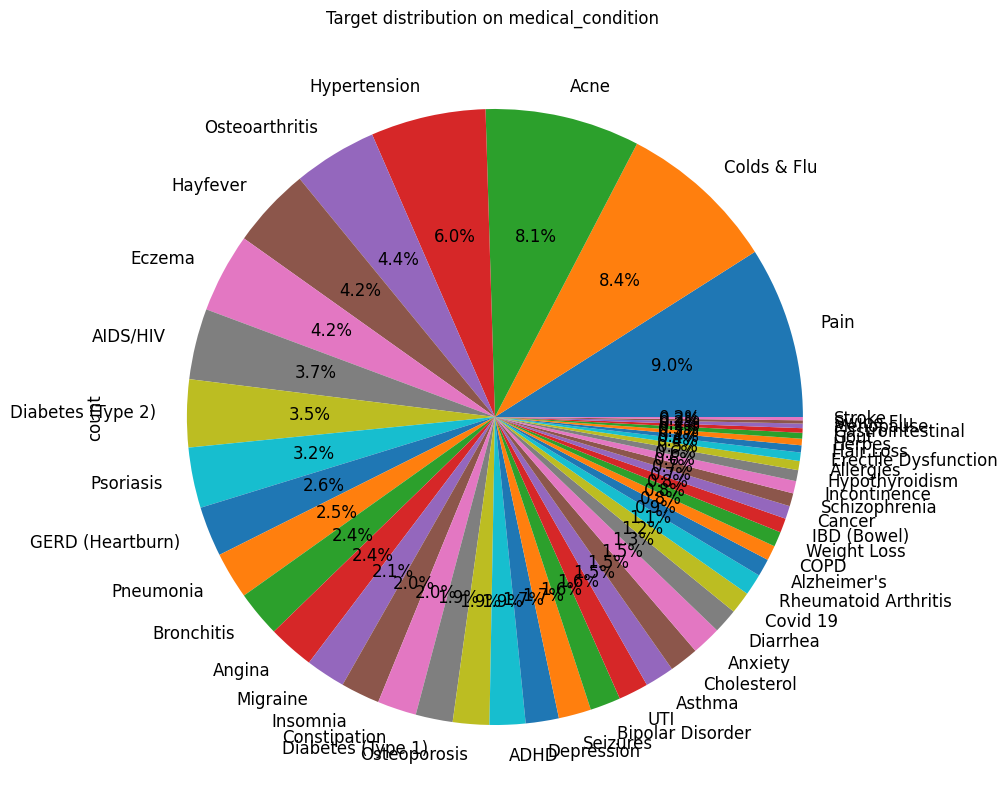

In [ ]:
# Figure size 
sns.set_context('poster', font_scale=0.5)
plt.figure(figsize=(10,10))
# Pie plot
data['medical_condition'].value_counts().plot.pie(autopct='%1.1f%%', textprops={'fontsize':12}).set_title("Target distribution on medical_condition ")
data['medical_condition'].value_counts()

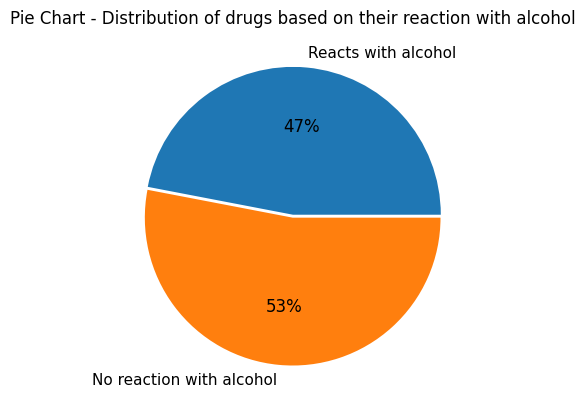

In [ ]:
#pie chart of drugs based on their reaction with Alcohol
cnts = 0

for i in data.index:
    if data["alcohol"][i] == 'X':
        cnts += 1
cnts_alcohol = [cnts, data.shape[0] - cnts]
mylabels = ["Reacts with alcohol", "No reaction with alcohol"]

# Alcohol
y = np.array(cnts_alcohol)
myexplode = [0.01]*2
plt.title("Pie Chart - Distribution of drugs based on their reaction with alcohol")
plt.pie(y, labels = mylabels, explode = myexplode, autopct='%.0f%%')
plt.show() 

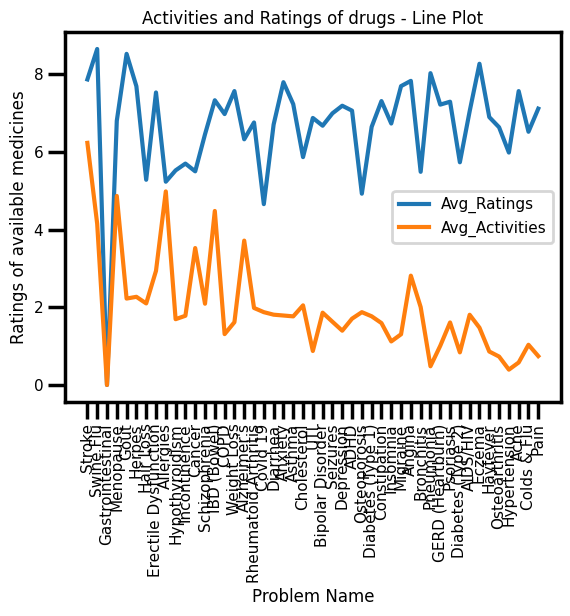

In [ ]:
# Medical Conditions vs Ratings
# line chart
avg_ratings = [0]*len(unique_medical_conditions)
avg_denominator = [0]*len(unique_medical_conditions)
avg_activities = [0]*len(unique_medical_conditions)
for i in range(len(unique_medical_conditions)):
    for j in data.index:
        if str(data["medical_condition"][j]) == unique_medical_conditions[i] and not np.isnan(data["rating"][j]):
            avg_ratings[i] += float(data["rating"][j])
            avg_denominator[i] += 1
            avg_activities[i] += float(data["activity"][j][:-1])

for i in range(len(unique_medical_conditions)):
    if avg_denominator[i] != 0:
        avg_ratings[i] = avg_ratings[i]/avg_denominator[i]
        avg_activities[i] = (avg_activities[i]/avg_denominator[i])/10


plt.plot(unique_medical_conditions, np.array(avg_ratings))
plt.plot(unique_medical_conditions, np.array(avg_activities))
plt.xlabel(f"Problem Name")
plt.ylabel(f"Ratings of available medicines")
plt.title(f"Activities and Ratings of drugs - Line Plot")
plt.legend(["Avg_Ratings", "Avg_Activities"])
plt.xticks(rotation=90)
plt.show()

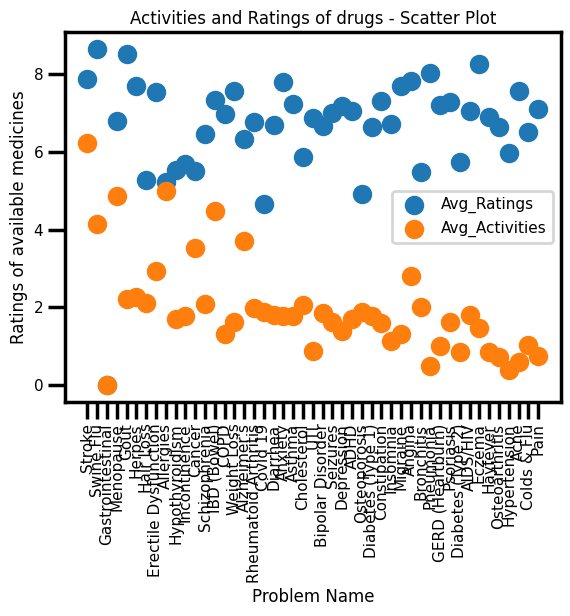

In [ ]:
#scatter plot
plt.scatter(unique_medical_conditions, np.array(avg_ratings))
plt.scatter(unique_medical_conditions, np.array(avg_activities))
plt.xlabel(f"Problem Name")
plt.ylabel(f"Ratings of available medicines")
plt.title(f"Activities and Ratings of drugs - Scatter Plot")
plt.legend(["Avg_Ratings", "Avg_Activities"])
plt.xticks(rotation=90)
plt.show()

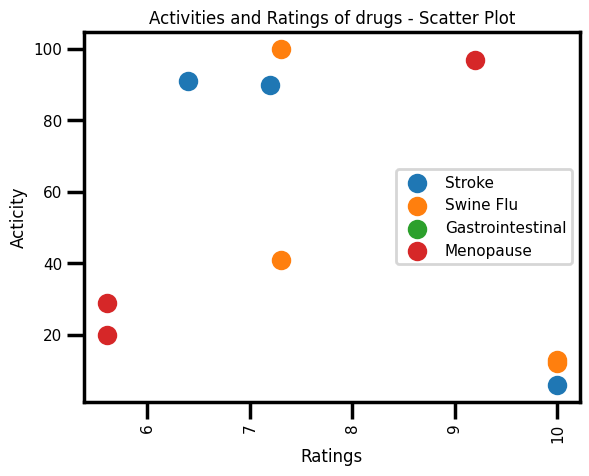

In [ ]:
#scatter plot of activities and ratings of drugs
num = 4
diseases = unique_medical_conditions[:num]
property_chosen = [data["rating"], data["activity"]]

properties = []

for i in diseases:
    dataa = data.loc[data['medical_condition'] == i]
    rating = list(dataa["rating"])
    activity = []
    for j in dataa.index:
        activity.append(int(dataa["activity"][j][:-1]))
    plt.scatter(rating, activity)
    plt.xlabel(f"Ratings")
    plt.ylabel(f"Acticity")
    plt.title(f"Activities and Ratings of drugs - Scatter Plot")
    plt.legend(diseases)
    plt.xticks(rotation=90)


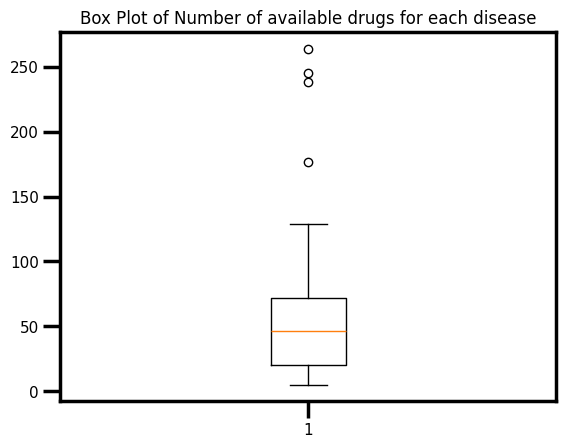

In [ ]:
# available_drugs_for_condns
#Box_whisker plots
plt.boxplot(available_drugs_for_condns)
plt.title(f"Box Plot of Number of available drugs for each disease")
plt.show()

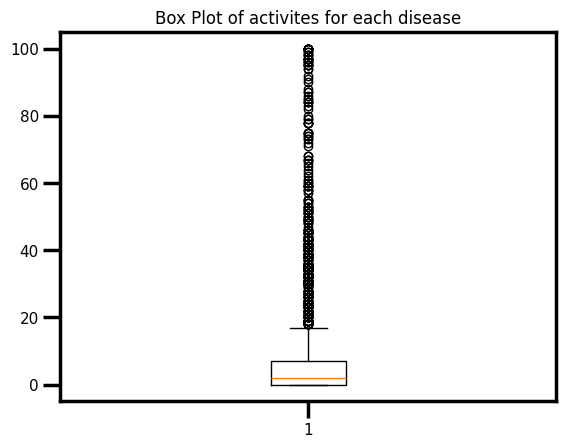

In [ ]:
plt.boxplot(activities)
plt.title(f"Box Plot of activites for each disease")
plt.show()

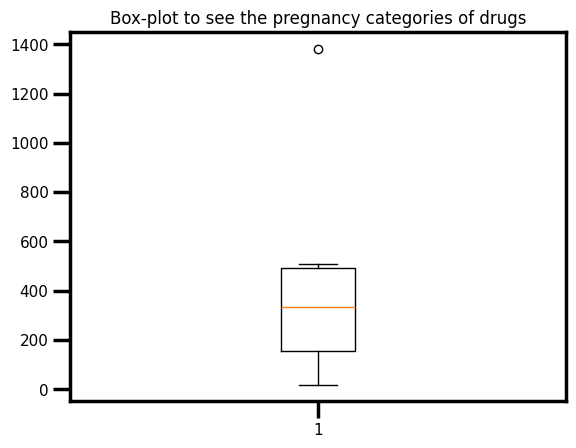

In [ ]:
plt.boxplot(cnts_preg_cat)
plt.title(f"Box-plot to see the pregnancy categories of drugs")
plt.show()

In [ ]:
#comparing rx_oct and medical_condition
import plotly.express as ex
ex.box(x = 'rx_otc', y = 'medical_condition',data_frame = data, template='seaborn', notched=True, width=800, height=500)

In [ ]:
#comparing drug_classes and medical_condition
ex.box(x = 'medical_condition', y = 'drug_classes',data_frame = data, template='seaborn', notched=True, width=1200, height=600)

In [ ]:
#comparing medical_condition and pregnancy_category
ex.box(x = 'medical_condition', y = 'pregnancy_category',data_frame = data, template='seaborn', notched=True, width=1200, height=600)

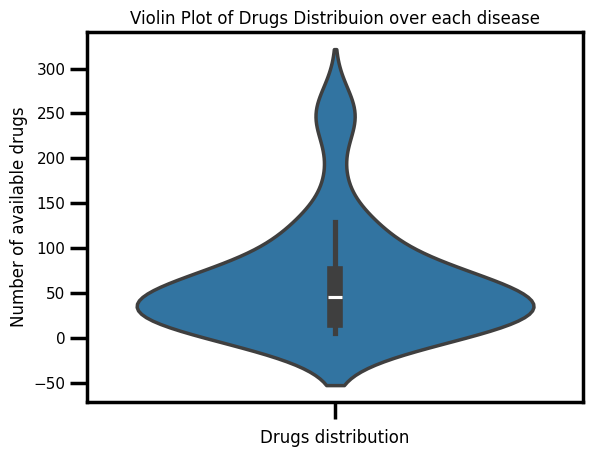

In [ ]:
#violin plots
sns.violinplot(available_drugs_for_condns)
plt.xlabel(f"Drugs distribution")
plt.ylabel(f"Number of available drugs")
plt.title(f"Violin Plot of Drugs Distribution over each disease")
plt.xticks(rotation=90)
plt.show()

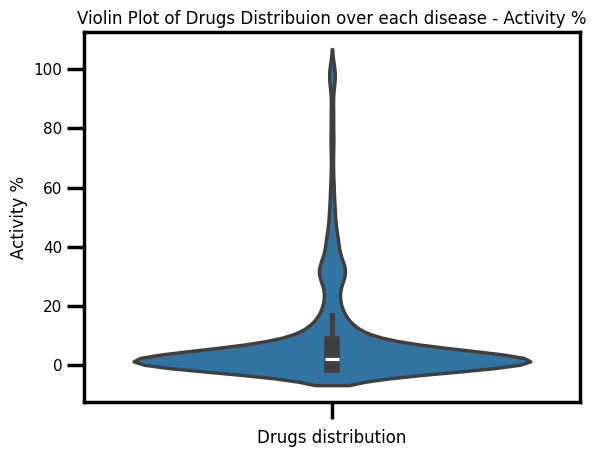

In [ ]:
sns.violinplot(activities)
plt.xlabel(f"Drugs distribution")
plt.ylabel(f"Activity %")
plt.title(f"Violin Plot of Drugs Distribution over each disease - Activity %")
plt.xticks(rotation=90)
plt.show()

(<Figure size 750x300 with 1 Axes>, <Axes: >)

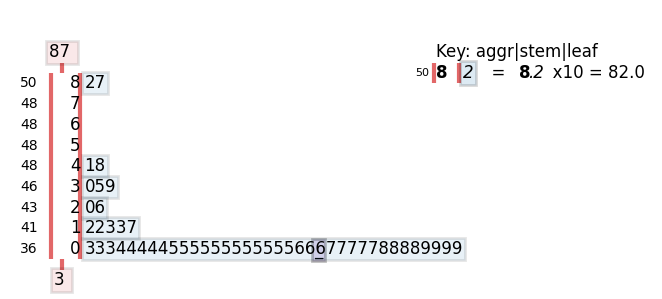

In [ ]:
data = pd.read_csv(r"drugs_side_effects_drugs_com.csv")
num = 50
activity = []
for i in data.index:
    activity.append(int(data["activity"][i][:-1]))
stemgraphic.stem_graphic(list(activity[:num]), scale = 10)


In [ ]:
#radar chart
categories = ["activity", "rating", "no_of_reviews"]

print("Radar Chart")
fig = go.Figure()
plt.Figure(figsize =(5, 3))

fig.add_trace(go.Scatterpolar(r=data.loc[data["medical_condition"] == 'Acne'], theta=categories, fill='toself', name='acne'))
fig.add_trace(go.Scatterpolar(r=data.loc[data["medical_condition"] == 'Anxiety'], theta=categories, fill='toself', name='anxiety'))
fig.add_trace(go.Scatterpolar(r=data.loc[data["medical_condition"] == 'Asthma'], theta=categories, fill='toself', name='asthma'))
fig.add_trace(go.Scatterpolar(r=data.loc[data["medical_condition"] == 'Weight Loss'], theta=categories, fill='toself', name='weight loss'))
fig.update_layout(autosize=False, width=400, height=400)

fig.show()

Radar Chart


In [ ]:
#funnel chart
arr = []
data = dict(time=available_drugs_for_condns,
            steps=unique_medical_conditions)

fig = px.funnel(data, x='time', y='steps')
print("Funnel Chart for Diseases and Available drugs")
fig.show()

Funnel Chart for Diseases and Available drugs


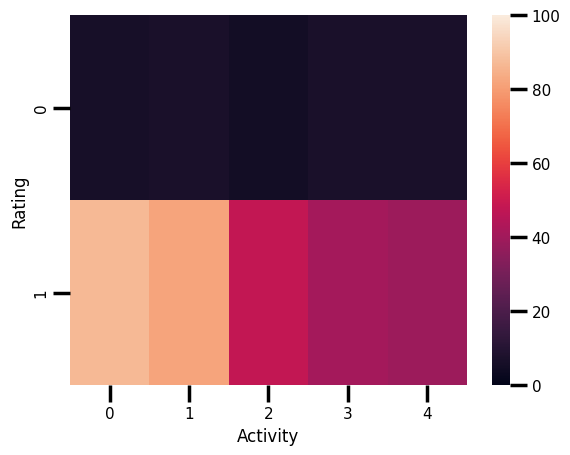

In [ ]:
#heat maps
data = load_data()
activity = []
rating = []
for i in data.index:
    activity.append(int(data["activity"][i][:-1]))
    if not np.isnan(data["rating"][i]):
            rating.append(int(data["rating"][i]))
    else:
            rating.append(0)
num = 5
# correlation_matrix = np.corrcoef(activity[:num], rating[:num])
heatmap_sepal = sns.heatmap([rating[:num], activity[:num]], vmin = 0, vmax = 100)
plt.xlabel("Activity")
plt.ylabel("Rating")
plt.show()

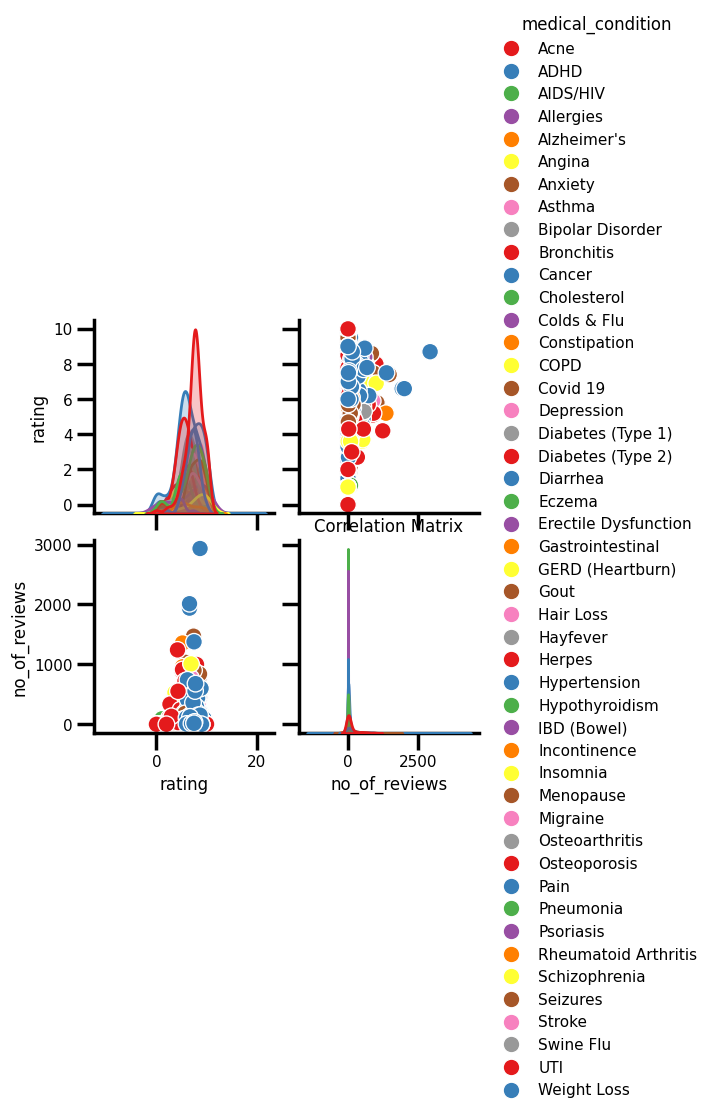

In [ ]:
data = load_data()
df = data[["medical_condition", "rating", "no_of_reviews"]]
# df.drop(columns=df.columns[0], axis=1,  inplace=True)
sns.pairplot(df, kind="scatter", hue="medical_condition", palette="Set1")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
#apriori algorithm
# Transactions
cnt = 0
for i in data.index:
    related_drugs[cnt].append(data["drug_name"][i])
    cnt += 1
    
print(related_drugs)

[['amoxicillin', 'prednisone', 'albuterol', 'ciprofloxacin', 'azithromycin', 'cephalexin', 'metronidazole', 'metronidazole topical', 'clindamycin topical', 'clindamycin', 'doxycycline'], ['amlodipine', 'lisinopril', 'losartan', 'metoprolol', 'furosemide', 'hydrochlorothiazide', 'carvedilol', 'warfarin', 'Lasix', 'bumetanide', 'spironolactone'], ['amoxicillin', 'prednisone', 'doxycycline', 'ciprofloxacin', 'azithromycin', 'cephalexin', 'metronidazole', 'clindamycin topical', 'Augmentin', 'dexamethasone', 'minocycline'], ['doxycycline', 'clindamycin topical', 'erythromycin topical', 'tetracycline', 'Tazorac', 'Accutane'], ['doxycycline', 'metronidazole', 'metronidazole topical', 'clindamycin', 'erythromycin topical', 'tetracycline', 'isotretinoin', 'tinidazole', 'Cleocin', 'MetroGel', 'clindamycin'], ['amlodipine', 'lisinopril', 'losartan', 'metoprolol', 'furosemide', 'hydrochlorothiazide', 'carvedilol', 'spironolactone', 'Lasix', 'bumetanide', 'Aldactone'], ['tretinoin'], ['doxycycline'

In [ ]:
te = TransactionEncoder()
te_ary = te.fit_transform(related_drugs)
print(te_ary)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [ ]:
df = pd.DataFrame(te_ary, columns=te.columns_)
print(df)

      7T Gummy ES Chewable Tablets  A-G Profen  A-Phedrin  Abatuss DMX  \
0                            False       False      False        False   
1                            False       False      False        False   
2                            False       False      False        False   
3                            False       False      False        False   
4                            False       False      False        False   
...                            ...         ...        ...          ...   
2926                         False       False      False        False   
2927                         False       False      False        False   
2928                         False       False      False        False   
2929                         False       False      False        False   
2930                         False       False      False        False   

      Abenol  Abilify  Abilify Maintena  Abilify MyCite  Abreva  Abrilada  \
0      False    False             

In [ ]:
# Use the Apriori algorithm to generate frequent itemsets
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

# Use the Association Rules algorithm to generate rules with a minimum confidence
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Print the frequent itemsets and association rules
print("Frequent Itemsets:")
print(frequent_itemsets)

print("\nAssociation Rules:")
print(rules)

Frequent Itemsets:
       support                                           itemsets
0     0.010235                                          (Abilify)
1     0.017741                                          (Atripla)
2     0.034459                                        (Augmentin)
3     0.012624                                         (Basaglar)
4     0.011941                                         (Belsomra)
...        ...                                                ...
2844  0.012624  (metoprolol, lisinopril, amlodipine, losartan,...
2845  0.015353  (cephalexin, amoxicillin, ciprofloxacin, doxyc...
2846  0.012282  (cephalexin, amoxicillin, ciprofloxacin, doxyc...
2847  0.015353  (cephalexin, amoxicillin, ciprofloxacin, doxyc...
2848  0.010235  (cephalexin, amoxicillin, ciprofloxacin, doxyc...

[2849 rows x 2 columns]

Association Rules:
                                     antecedents  \
0                                      (Atripla)   
1                                     (C

In [ ]:
# Get the length of the largest frequent itemset
max_len = frequent_itemsets["itemsets"].apply(lambda x: len(x)).max()

# Print only the last level of frequent itemsets
print("Frequent Itemsets (Level {}):".format(max_len))
last_level_itemsets = frequent_itemsets[frequent_itemsets["itemsets"].apply(lambda x: len(x))==max_len]
print(last_level_itemsets)

# Use the Association Rules algorithm to generate rules with a minimum confidence
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Print the association rules for the last level frequent itemsets
print("\nAssociation Rules for Frequent Itemsets (Level {}):".format(max_len))
last_level_rules = rules[rules["antecedents"].apply(lambda x: len(x)==max_len)]
print(last_level_rules)

Frequent Itemsets (Level 9):
       support                                           itemsets
2847  0.015353  (cephalexin, amoxicillin, ciprofloxacin, doxyc...
2848  0.010235  (cephalexin, amoxicillin, ciprofloxacin, doxyc...

Association Rules for Frequent Itemsets (Level 9):
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, representativity, leverage, conviction, zhangs_metric, jaccard, certainty, kulczynski]
Index: []


In [ ]:
#traversal through database for once took 4 mins
import numpy as np
# Gather All Items of Each Transactions into Numpy Array
from itertools import chain
transaction = list(chain.from_iterable(related_drugs))
# converting to numpy array
transaction = np.array(transaction)
print(transaction)

['amoxicillin' 'prednisone' 'albuterol' ... 'methamphetamine' 'Alli'
 'setmelanotide']


In [ ]:
#  Transform Them a Pandas DataFrame
df = pd.DataFrame(transaction, columns=["items"]) 
# Put 1 to Each Item For Making Countable Table, to be able to perform Group By
df["incident_count"] = 1 
#  Delete NaN Items from Dataset
indexNames = df[df['items'] == "nan" ].index
df.drop(indexNames , inplace=True)
# Making a New Appropriate Pandas DataFrame for Visualizations  
df_table = df.groupby("items").sum().sort_values("incident_count", ascending=False).reset_index()
#  Initial Visualizations
df_table.head(5).style.background_gradient(cmap='Blues')

In [ ]:
# to have a same origin
df_table["all"] = "Top 50 items" 
# creating tree map using plotly
fig = px.treemap(df_table.head(50), path=['all', "items"], values='incident_count',
                  color=df_table["incident_count"].head(50), hover_data=['items'],
                  color_continuous_scale='Blues',
                )
# ploting the treemap
fig.show()

In [ ]:
te = TransactionEncoder()
te_ary = te.fit_transform(related_drugs)

# Print the one-hot encoded Boolean array
print(te_ary)
dataset = pd.DataFrame(te_ary, columns=te.columns_)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [ ]:
# select top 30 items
first30 = df_table["items"].head(30).values 
# Extract Top 30
dataset = dataset.loc[:,first30] 
# shape of the dataset
dataset.shape

(2931, 30)

In [ ]:
# select top 30 items
first30 = df_table["items"].head(30).values 
# Extract Top 30
dataset = dataset.loc[:,first30] 
# shape of the dataset
dataset.shape

(2931, 30)

In [ ]:
from mlxtend.frequent_patterns.fpgrowth import fpgrowth
#running the fpgrowth algorithm
res=fpgrowth(dataset,min_support=0.05, use_colnames=True)
# printing top 10
res

support                                           itemsets
0   0.126919                                       (prednisone)
1   0.070966                                      (doxycycline)
2   0.055954                                           (Humira)
3   0.053565                                  (diphenhydramine)
4   0.050836                                         (Benadryl)
..       ...                                                ...
63  0.050495  (tramadol, oxycodone, aspirin, Tylenol, naproxen)
64  0.050495  (tramadol, acetaminophen, oxycodone, aspirin, ...
65  0.050495  (acetaminophen, oxycodone, aspirin, Tylenol, n...
66  0.050495  (tramadol, acetaminophen, oxycodone, aspirin, ...
67  0.050495  (tramadol, acetaminophen, oxycodone, aspirin, ...

[68 rows x 2 columns]

In [ ]:
transactions = related_drugs
print(transactions[:10])

[['amoxicillin', 'prednisone', 'albuterol', 'ciprofloxacin', 'azithromycin', 'cephalexin', 'metronidazole', 'metronidazole topical', 'clindamycin topical', 'clindamycin', 'doxycycline'], ['amlodipine', 'lisinopril', 'losartan', 'metoprolol', 'furosemide', 'hydrochlorothiazide', 'carvedilol', 'warfarin', 'Lasix', 'bumetanide', 'spironolactone'], ['amoxicillin', 'prednisone', 'doxycycline', 'ciprofloxacin', 'azithromycin', 'cephalexin', 'metronidazole', 'clindamycin topical', 'Augmentin', 'dexamethasone', 'minocycline'], ['doxycycline', 'clindamycin topical', 'erythromycin topical', 'tetracycline', 'Tazorac', 'Accutane'], ['doxycycline', 'metronidazole', 'metronidazole topical', 'clindamycin', 'erythromycin topical', 'tetracycline', 'isotretinoin', 'tinidazole', 'Cleocin', 'MetroGel', 'clindamycin'], ['amlodipine', 'lisinopril', 'losartan', 'metoprolol', 'furosemide', 'hydrochlorothiazide', 'carvedilol', 'spironolactone', 'Lasix', 'bumetanide', 'Aldactone'], ['tretinoin'], ['doxycycline'

In [ ]:
# Generate frequent 1-itemsets
candidate_1_itemsets = []
for transaction in transactions:
    for item in transaction:
        if [item] not in candidate_1_itemsets:
            candidate_1_itemsets.append([item])
print(len(candidate_1_itemsets))                        
print(candidate_1_itemsets)            

3177
[['amoxicillin'], ['prednisone'], ['albuterol'], ['ciprofloxacin'], ['azithromycin'], ['cephalexin'], ['metronidazole'], ['metronidazole topical'], ['clindamycin topical'], ['clindamycin'], ['doxycycline'], ['amlodipine'], ['lisinopril'], ['losartan'], ['metoprolol'], ['furosemide'], ['hydrochlorothiazide'], ['carvedilol'], ['warfarin'], ['Lasix'], ['bumetanide'], ['spironolactone'], ['Augmentin'], ['dexamethasone'], ['minocycline'], ['erythromycin topical'], ['tetracycline'], ['Tazorac'], ['Accutane'], ['isotretinoin'], ['tinidazole'], ['Cleocin'], ['MetroGel'], ['Aldactone'], ['tretinoin'], ['Bactrim'], ['Retin-A'], ['Aczone'], ['ivermectin topical'], ['minocycline topical'], ['brimonidine topical'], ['oxymetazoline topical'], ['benzoyl peroxide'], ['Differin'], ['Epiduo'], ['adapalene'], ['Doryx'], ['Septra'], ['Solodyn'], ['Cosentyx'], ['Enbrel'], ['Humira'], ['Otezla'], ['Stelara'], ['Taltz'], ['Duobrii'], ['methotrexate'], ['Vibramycin'], ['ceftriaxone'], ['levofloxacin'], [

In [ ]:
def prune(itemsets, min_support, transactions):
    frequent_itemsets = []
    for itemset in itemsets:
        support_count = 0
        for transaction in transactions:
            if set(itemset).issubset(set(transaction)):
                support_count += 1
        if support_count >= min_support:
            frequent_itemsets.append(itemset)
    return frequent_itemsets
frequent_itemsets = prune(candidate_1_itemsets, 100 , transactions)
print(len(frequent_itemsets))
print(frequent_itemsets)

32
[['amoxicillin'], ['prednisone'], ['ciprofloxacin'], ['azithromycin'], ['clindamycin topical'], ['doxycycline'], ['amlodipine'], ['lisinopril'], ['losartan'], ['metoprolol'], ['furosemide'], ['hydrochlorothiazide'], ['Augmentin'], ['erythromycin topical'], ['Cosentyx'], ['Humira'], ['Stelara'], ['Taltz'], ['Benadryl'], ['diphenhydramine'], ['Buprenex'], ['aspirin'], ['acetaminophen'], ['tramadol'], ['Tylenol'], ['naproxen'], ['fluticasone nasal'], ['montelukast'], ['cetirizine'], ['promethazine'], ['ibuprofen'], ['oxycodone']]


In [ ]:
def generate_candidates(itemsets, k):
    candidates = []
    for itemset1 in itemsets:
        for itemset2 in itemsets:
            if itemset1 != itemset2 and len(set(itemset1) | set(itemset2)) == k:
                candidate = sorted(list(set(itemset1) | set(itemset2)))
                if candidate not in candidates:
                    candidates.append(candidate)
    return candidates

'''candidate_2_itemsets = generate_candidates(frequent_itemsets,2)
frequent_itemsets = prune(candidate_2_itemsets, 300 , transactions)
print(frequent_itemsets)
print("\n")'''

def flatten(l):
    return set([item for sublist in l for item in sublist])

k=2
while len(frequent_itemsets)>0:
    candidate_itemsets=generate_candidates(frequent_itemsets,k)
    reduced_transactions = []
    for transaction in transactions:
        reduced_transaction = [item for item in transaction if item in set(flatten(frequent_itemsets))]
        if len(reduced_transaction) > 0:
            reduced_transactions.append(reduced_transaction)
    frequent_itemsets = prune(candidate_itemsets, 100 , reduced_transactions)
    print("itemsets of length ",k)
    print(len(frequent_itemsets))
    print(frequent_itemsets)  
    print("\n")
    k+=1

itemsets of length  2
56
[['amoxicillin', 'ciprofloxacin'], ['amoxicillin', 'doxycycline'], ['Augmentin', 'amoxicillin'], ['Humira', 'prednisone'], ['fluticasone nasal', 'prednisone'], ['montelukast', 'prednisone'], ['cetirizine', 'prednisone'], ['ciprofloxacin', 'doxycycline'], ['Augmentin', 'ciprofloxacin'], ['clindamycin topical', 'doxycycline'], ['clindamycin topical', 'erythromycin topical'], ['doxycycline', 'erythromycin topical'], ['amlodipine', 'lisinopril'], ['amlodipine', 'losartan'], ['amlodipine', 'metoprolol'], ['amlodipine', 'furosemide'], ['amlodipine', 'hydrochlorothiazide'], ['lisinopril', 'losartan'], ['lisinopril', 'metoprolol'], ['furosemide', 'lisinopril'], ['hydrochlorothiazide', 'lisinopril'], ['losartan', 'metoprolol'], ['furosemide', 'losartan'], ['hydrochlorothiazide', 'losartan'], ['furosemide', 'metoprolol'], ['hydrochlorothiazide', 'metoprolol'], ['furosemide', 'hydrochlorothiazide'], ['Cosentyx', 'Humira'], ['Cosentyx', 'Stelara'], ['Cosentyx', 'Taltz'], [

In [ ]:
#closed frequent itemsets
from mlxtend.frequent_patterns import apriori
import pandas as pd

# 1. Increase min_support to speed up the process
frequent_itemsets = apriori(df_encoded, min_support=0.05, use_colnames=True)

# 2. Add a length column to help with filtering
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

# 3. Optimized Closed Itemset check
# We only need to check if an itemset is a subset of a LONGER itemset
closed_items = []
for index, row in frequent_itemsets.iterrows():
    is_closed = True
    # Only compare against itemsets that are longer and have the same support
    potential_supersets = frequent_itemsets[
        (frequent_itemsets['length'] > row['length']) & 
        (frequent_itemsets['support'] == row['support'])
    ]
    
    for _, row2 in potential_supersets.iterrows():
        if row['itemsets'].issubset(row2['itemsets']):
            is_closed = False
            break
            
    if is_closed:
        closed_items.append(row)

closed_frequent_df = pd.DataFrame(closed_items)
print(closed_frequent_df.head(10))


     support                  itemsets  length
0   0.050836                (Benadryl)       1
1   0.055954                  (Humira)       1
3   0.071307           (acetaminophen)       1
4   0.097919                 (aspirin)       1
5   0.053565         (diphenhydramine)       1
6   0.070966             (doxycycline)       1
7   0.065848                (naproxen)       1
9   0.126919              (prednisone)       1
11  0.059707  (acetaminophen, Tylenol)       2
16  0.069942  (aspirin, acetaminophen)       2


In [ ]:
#decision tree
data = pd.read_csv(r"drugs_side_effects_drugs_com.csv")

data = data.replace('nan', np.nan)
data = data.dropna()

In [ ]:
data.alcohol.unique()

array(['X'], dtype=object)

In [ ]:
data.pregnancy_category.unique()

array(['D', 'C', 'X', 'B', 'N'], dtype=object)

In [ ]:
# create a dictionary to map the values
pregnancy_map = {'X': 0, 'B': 1, 'C': 2, 'D': 3, 'N' : 0}

# map the values in the 'pregnancy' column using the dictionary
data['pregnancy_category'] = data['pregnancy_category'].map(pregnancy_map)
            
data

drug_name medical_condition  \
0                                           doxycycline              Acne   
1                                        spironolactone              Acne   
5                                             Aldactone              Acne   
7                                          isotretinoin              Acne   
22                                            Acticlate              Acne   
...                                                 ...               ...   
2886  hyoscyamine / methenamine / methylene blue / p...               UTI   
2890                                         Phosphasal               UTI   
2914                                    phendimetrazine       Weight Loss   
2924                                            Lomaira       Weight Loss   
2926                                      benzphetamine       Weight Loss   

                                           side_effects  \
0     (hives, difficult breathing, swelling in your ...   
1     hives ; difficulty breathing; swelling of your...   
5     hives ; difficulty breathing; swelling of your...   
7     problems with your vision or hearing; muscle o...   
22    WARNING/CAUTION: Even though it may be rare, s...   
...                                                 ...   
2886  hives ; difficult breathing; swelling of your ...   
2890  hives ; difficult breathing; swelling of your ...   
2914  hives ; difficult breathing; swelling of your ...   
2924  hives ; difficult breathing; swelling of your ...   
2926  hives ; difficulty breathing; swelling of your...   

                                           generic_name  \
0                                           doxycycline   
1                                        spironolactone   
5                                        spironolactone   
7                                   isotretinoin (oral)   
22                     Doxycycline Tablets and Capsules   
...                                                 ...   
2886  hyoscyamine, methenamine, methylene blue, phen...   
2890  hyoscyamine, methenamine, methylene blue, phen...   
2914                                    phendimetrazine   
2924                                        phentermine   
2926                                      benzphetamine   

                                           drug_classes  \
0            Miscellaneous antimalarials, Tetracyclines   
1     Aldosterone receptor antagonists, Potassium-sp...   
5     Aldosterone receptor antagonists, Potassium-sp...   
7     Miscellaneous antineoplastics, Miscellaneous u...   
22                                        Tetracyclines   
...                                                 ...   
2886                             Urinary antispasmodics   
2890                             Urinary antispasmodics   
2914                        Anorexiants, CNS stimulants   
2924                                        Anorexiants   
2926                        Anorexiants, CNS stimulants   

                                            brand_names activity rx_otc  \
0     Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...      87%     Rx   
1                                   Aldactone, CaroSpir      82%     Rx   
5                                              CaroSpir      35%     Rx   
7     Absorica, Accutane, Amnesteem, Claravis, Myori...      26%     Rx   
22    Adoxa, Avidoxy, Monodox, Morgidox, Oraxyl, Tar...       7%     Rx   
...                                                 ...      ...    ...   
2886  Azuphen MB, Hyolev MB, Phosphasal, UR N-C, Ura...       0%     Rx   
2890  Azuphen MB, Hyolev MB, UR N-C, Uramit MB, urel...       0%     Rx   
2914                                            Melfiat      14%     Rx   
2924                                 Adipex-P, Suprenza       3%     Rx   
2926                                    Didrex, Regimex       2%     Rx   

      pregnancy_category csa alcohol  \
0                      3   N       X   
1            

In [ ]:
data.rx_otc.unique()

array(['Rx', 'Rx/OTC', 'OTC'], dtype=object)

In [ ]:
# create a dictionary to map the values
rx_map = {'Rx': 0, 'OTC': 1, 'Rx/OTC': 2}

# map the values in the 'pregnancy' column using the dictionary
data['rx_otc'] = data['rx_otc'].map(rx_map)
            
data

drug_name medical_condition  \
0                                           doxycycline              Acne   
1                                        spironolactone              Acne   
5                                             Aldactone              Acne   
7                                          isotretinoin              Acne   
22                                            Acticlate              Acne   
...                                                 ...               ...   
2886  hyoscyamine / methenamine / methylene blue / p...               UTI   
2890                                         Phosphasal               UTI   
2914                                    phendimetrazine       Weight Loss   
2924                                            Lomaira       Weight Loss   
2926                                      benzphetamine       Weight Loss   

                                           side_effects  \
0     (hives, difficult breathing, swelling in your ...   
1     hives ; difficulty breathing; swelling of your...   
5     hives ; difficulty breathing; swelling of your...   
7     problems with your vision or hearing; muscle o...   
22    WARNING/CAUTION: Even though it may be rare, s...   
...                                                 ...   
2886  hives ; difficult breathing; swelling of your ...   
2890  hives ; difficult breathing; swelling of your ...   
2914  hives ; difficult breathing; swelling of your ...   
2924  hives ; difficult breathing; swelling of your ...   
2926  hives ; difficulty breathing; swelling of your...   

                                           generic_name  \
0                                           doxycycline   
1                                        spironolactone   
5                                        spironolactone   
7                                   isotretinoin (oral)   
22                     Doxycycline Tablets and Capsules   
...                                                 ...   
2886  hyoscyamine, methenamine, methylene blue, phen...   
2890  hyoscyamine, methenamine, methylene blue, phen...   
2914                                    phendimetrazine   
2924                                        phentermine   
2926                                      benzphetamine   

                                           drug_classes  \
0            Miscellaneous antimalarials, Tetracyclines   
1     Aldosterone receptor antagonists, Potassium-sp...   
5     Aldosterone receptor antagonists, Potassium-sp...   
7     Miscellaneous antineoplastics, Miscellaneous u...   
22                                        Tetracyclines   
...                                                 ...   
2886                             Urinary antispasmodics   
2890                             Urinary antispasmodics   
2914                        Anorexiants, CNS stimulants   
2924                                        Anorexiants   
2926                        Anorexiants, CNS stimulants   

                                            brand_names activity  rx_otc  \
0     Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...      87%       0   
1                                   Aldactone, CaroSpir      82%       0   
5                                              CaroSpir      35%       0   
7     Absorica, Accutane, Amnesteem, Claravis, Myori...      26%       0   
22    Adoxa, Avidoxy, Monodox, Morgidox, Oraxyl, Tar...       7%       0   
...                                                 ...      ...     ...   
2886  Azuphen MB, Hyolev MB, Phosphasal, UR N-C, Ura...       0%       0   
2890  Azuphen MB, Hyolev MB, UR N-C, Uramit MB, urel...       0%       0   
2914                                            Melfiat      14%       0   
2924                                 Adipex-P, Suprenza       3%       0   
2926                                    Didrex, Regimex       2%       0   

      pregnancy_category csa alcohol  \
0                      3   N       X   
1

In [ ]:
data.activity.unique()

array(['87%', '82%', '35%', '26%', '7%', '5%', '4%', '2%', '1%', '0%',
       '95%', '51%', '32%', '16%', '14%', '12%', '3%', '9%', '75%', '19%',
       '8%', '94%', '78%', '67%', '59%', '10%', '96%', '37%', '34%',
       '17%', '6%', '53%', '30%', '100%', '33%', '68%', '42%', '28%',
       '21%', '11%', '73%', '72%', '15%', '97%', '20%', '58%', '13%',
       '36%', '29%', '52%', '46%', '40%', '22%', '23%', '38%'],
      dtype=object)

In [ ]:
data['activity'] = data['activity'].str.strip('%')
data.activity.unique()

array(['87', '82', '35', '26', '7', '5', '4', '2', '1', '0', '95', '51',
       '32', '16', '14', '12', '3', '9', '75', '19', '8', '94', '78',
       '67', '59', '10', '96', '37', '34', '17', '6', '53', '30', '100',
       '33', '68', '42', '28', '21', '11', '73', '72', '15', '97', '20',
       '58', '13', '36', '29', '52', '46', '40', '22', '23', '38'],
      dtype=object)

In [ ]:
data['activity'] = data['activity'].astype(float)
data.activity.unique()

array([ 87.,  82.,  35.,  26.,   7.,   5.,   4.,   2.,   1.,   0.,  95.,
        51.,  32.,  16.,  14.,  12.,   3.,   9.,  75.,  19.,   8.,  94.,
        78.,  67.,  59.,  10.,  96.,  37.,  34.,  17.,   6.,  53.,  30.,
       100.,  33.,  68.,  42.,  28.,  21.,  11.,  73.,  72.,  15.,  97.,
        20.,  58.,  13.,  36.,  29.,  52.,  46.,  40.,  22.,  23.,  38.])

In [ ]:
data

drug_name medical_condition  \
0                                           doxycycline              Acne   
1                                        spironolactone              Acne   
5                                             Aldactone              Acne   
7                                          isotretinoin              Acne   
22                                            Acticlate              Acne   
...                                                 ...               ...   
2886  hyoscyamine / methenamine / methylene blue / p...               UTI   
2890                                         Phosphasal               UTI   
2914                                    phendimetrazine       Weight Loss   
2924                                            Lomaira       Weight Loss   
2926                                      benzphetamine       Weight Loss   

                                           side_effects  \
0     (hives, difficult breathing, swelling in your ...   
1     hives ; difficulty breathing; swelling of your...   
5     hives ; difficulty breathing; swelling of your...   
7     problems with your vision or hearing; muscle o...   
22    WARNING/CAUTION: Even though it may be rare, s...   
...                                                 ...   
2886  hives ; difficult breathing; swelling of your ...   
2890  hives ; difficult breathing; swelling of your ...   
2914  hives ; difficult breathing; swelling of your ...   
2924  hives ; difficult breathing; swelling of your ...   
2926  hives ; difficulty breathing; swelling of your...   

                                           generic_name  \
0                                           doxycycline   
1                                        spironolactone   
5                                        spironolactone   
7                                   isotretinoin (oral)   
22                     Doxycycline Tablets and Capsules   
...                                                 ...   
2886  hyoscyamine, methenamine, methylene blue, phen...   
2890  hyoscyamine, methenamine, methylene blue, phen...   
2914                                    phendimetrazine   
2924                                        phentermine   
2926                                      benzphetamine   

                                           drug_classes  \
0            Miscellaneous antimalarials, Tetracyclines   
1     Aldosterone receptor antagonists, Potassium-sp...   
5     Aldosterone receptor antagonists, Potassium-sp...   
7     Miscellaneous antineoplastics, Miscellaneous u...   
22                                        Tetracyclines   
...                                                 ...   
2886                             Urinary antispasmodics   
2890                             Urinary antispasmodics   
2914                        Anorexiants, CNS stimulants   
2924                                        Anorexiants   
2926                        Anorexiants, CNS stimulants   

                                            brand_names  activity  rx_otc  \
0     Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...      87.0       0   
1                                   Aldactone, CaroSpir      82.0       0   
5                                              CaroSpir      35.0       0   
7     Absorica, Accutane, Amnesteem, Claravis, Myori...      26.0       0   
22    Adoxa, Avidoxy, Monodox, Morgidox, Oraxyl, Tar...       7.0       0   
...                                                 ...       ...     ...   
2886  Azuphen MB, Hyolev MB, Phosphasal, UR N-C, Ura...       0.0       0   
2890  Azuphen MB, Hyolev MB, UR N-C, Uramit MB, urel...       0.0       0   
2914                                            Melfiat      14.0       0   
2924                                 Adipex-P, Suprenza       3.0       0   
2926                                    Didrex, Regimex       2.0       0   

      pregnancy_category csa alcohol  \
0                      3   N 

In [ ]:
data.pregnancy_category.unique()

array([3, 2, 0, 1])

In [ ]:
df=data
# convert each column to a numeric data type
df_numeric = df.apply(pd.to_numeric, errors='coerce')

# drop columns with non-numeric values
df_clean = df_numeric.dropna(axis=1)

# display the updated DataFrame
print(df_clean)

      activity  rx_otc  pregnancy_category  rating  no_of_reviews
0         87.0       0                   3     6.8          760.0
1         82.0       0                   2     7.2          449.0
5         35.0       0                   2     7.6            8.0
7         26.0       0                   0     8.0          999.0
22         7.0       0                   3     5.7            8.0
...        ...     ...                 ...     ...            ...
2886       0.0       0                   2     6.3           39.0
2890       0.0       0                   2     8.5            2.0
2914      14.0       0                   2     8.3          150.0
2924       3.0       0                   0     7.6           40.0
2926       2.0       0                   0     7.5           17.0

[251 rows x 5 columns]


In [ ]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

df=df_clean
# split the data into input and output variables
X = df.drop('rx_otc', axis=1)
y = df['rx_otc']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# create a decision tree classifier with default parameters
dtc = DecisionTreeClassifier()

# train the model on the training data
dtc.fit(X_train, y_train)

# evaluate the model on the testing data
score = dtc.score(X_test, y_test)

print(f"Decision Tree Accuracy: {score:.3f}")

Decision Tree Accuracy: 0.776


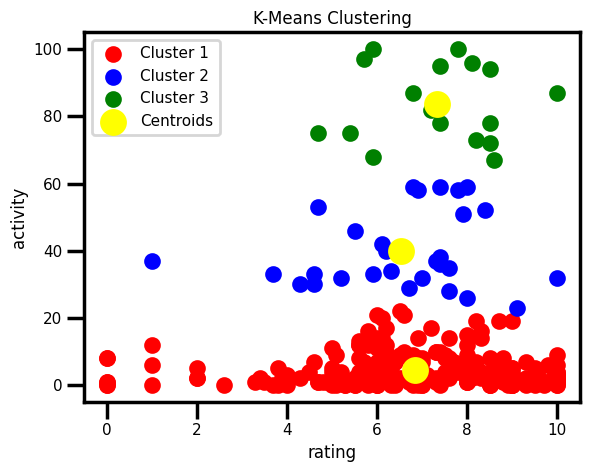

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# perform k-means clustering with k=3
df=df_clean
df=data[['rating', 'activity']]
df = df.dropna()

X = df.values
X = df.values
kmeans = KMeans(n_clusters=3)
y_kmeans = kmeans.fit_predict(X)

# visualize the clusters with a scatter plot
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('K-Means Clustering')
plt.xlabel('rating')
plt.ylabel('activity')
plt.legend()
plt.show()

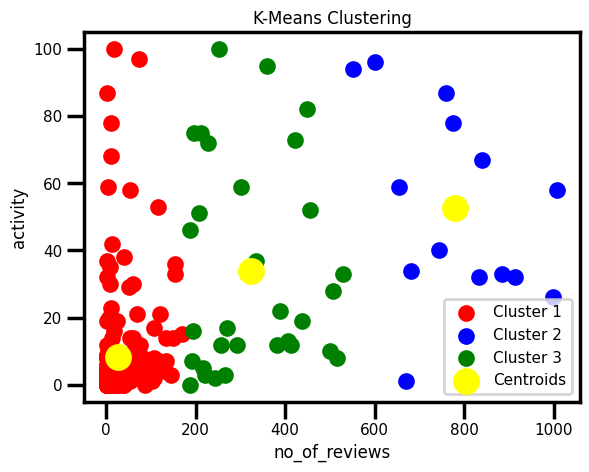

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# perform k-means clustering with k=3
df=df_clean
df=data[['no_of_reviews', 'activity']]
df = df.dropna()

X = df.values
X = df.values
kmeans = KMeans(n_clusters=3)
y_kmeans = kmeans.fit_predict(X)

# visualize the clusters with a scatter plot
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('K-Means Clustering')
plt.xlabel('no_of_reviews')
plt.ylabel('activity')
plt.legend()
plt.show()